# Exploratory Analysis into Energy Efficency Data

1. Import packages and data

In [1]:
# Packages

import pandas as pd
import numpy as np
import geopandas as gpd
import urllib
import os
import seaborn as sns
import statsmodels.api as sm
from pysal.explore import esda 
import libpysal as lps
import matplotlib.pyplot as plt
import xlrd
from functools import reduce

os.getcwd()

'/home/jovyan/work/OneDrive/UCL/Quantitative-Methods/Assesment 2'

In [4]:
# Loading in data

# Energy data - download from https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/energyefficiencyofhousingenglandandwalesmiddlelayersuperoutputarea
# Store in working directors

#Energy effciency for all dwellings

path = "energyefficiencyofhousingenglandandwalesmiddlelayersuperoutputareauptomarch2021.xlsx"

eneff = pd.read_excel(path, "1a", engine='openpyxl', skiprows=range(0,3), index_col=1)
eneff.to_csv('eneff.csv', index=False)
eneff = pd.read_csv('eneff.csv', low_memory=False, header=0)
eneff.rename(columns = {"All dwellings": "Median Energy Efficency Score"}, inplace=True)

epcc = pd.read_excel(path, "1b", engine='openpyxl', skiprows=range(0,3), index_col=1)
epcc.to_csv('epcc.csv', index=False)
epcc = pd.read_csv('epcc.csv', low_memory=False, header=0)
epcc.rename(columns = {"All dwellings": "Percentage above C"}, inplace=True)

envimp = pd.read_excel(path, "1c", engine='openpyxl', skiprows=range(0,3), index_col=1)
envimp.to_csv('envimp.csv', index=False)
envimp = pd.read_csv('envimp.csv', low_memory=False, header=0)
envimp.rename(columns = {"All dwellings": "Median Environmenal Impact Score"}, inplace=True)

co2 = pd.read_excel(path, "1d", engine='openpyxl', skiprows=range(0,3), index_col=1)
co2.to_csv('co2.csv', index=False)
co2 = pd.read_csv('co2.csv', low_memory=False, header=0)
co2.rename(columns = {"All dwellings": "Median CO2 Emsissions"}, inplace=True)

cost = pd.read_excel(path, "1e", engine='openpyxl', skiprows=range(0,3), index_col=1)
cost.to_csv('cost.csv', index=False)
cost = pd.read_csv('cost.csv', low_memory=False, header=0)
cost.rename(columns = {"All dwellings": "Median Energy Cost"}, inplace=True)

fuel = pd.read_excel(path, "1f", engine='openpyxl', skiprows=range(0,3), index_col=1)
fuel.to_csv('fuel.csv', index=False)
fuel = pd.read_csv('fuel.csv', low_memory=False, header=0)
fuel.rename(columns = {"All dwellings": "Median Score"}, inplace=True)

# Part 2 - existing and new

eneffboth = pd.read_excel(path, "2a", engine='openpyxl', skiprows=range(0,3), index_col=1)
eneffboth.to_csv('eneffboth.csv', index=False)
eneffboth = pd.read_csv('eneffboth.csv', low_memory=False, header=0)
eneffboth.rename(columns = {"Existing dwellings": "Median Energy Efficency Score Existing Dwellings", "New dwellings":"Median Energy Efficency Score New Dwellings"}, inplace=True)

epccboth = pd.read_excel(path, "2b", engine='openpyxl', skiprows=range(0,3), index_col=1)
epccboth.to_csv('epccboth.csv', index=False)
epccboth = pd.read_csv('epccboth.csv', low_memory=False, header=0)

envimpboth = pd.read_excel(path, "2c", engine='openpyxl', skiprows=range(0,3), index_col=1)
envimpboth.to_csv('envimpboth.csv', index=False)
envimpboth = pd.read_csv('envimpboth.csv', low_memory=False, header=0)
envimpboth.rename(columns = {"Existing dwellings": "Median Environmental Impact Score Existing Dwellings", "New dwellings":"Median Environmental Impact Score New Dwellings"}, inplace=True)

co2both = pd.read_excel(path, "2d", engine='openpyxl', skiprows=range(0,3), index_col=1)
co2both.to_csv('co2both.csv', index=False)
co2both = pd.read_csv('co2both.csv', low_memory=False, header=0)
co2both.rename(columns = {"Existing dwellings": "Median CO2 Emissions Existing Dwellings", "New dwellings":"Median CO2 Emissions New Dwellings"}, inplace=True)

costboth = pd.read_excel(path, "2e", engine='openpyxl', skiprows=range(0,3), index_col=1)
costboth.to_csv('costboth.csv', index=False)
costboth = pd.read_csv('costboth.csv', low_memory=False, header=0)
costboth.rename(columns = {"Existing dwellings": "Median Cost Existing Dwellings", "New dwellings":"Median Cost New Dwellings"}, inplace=True)

fuelboth = pd.read_excel(path, "2f", engine='openpyxl', skiprows=range(0,3), index_col=1)
fuelboth.to_csv('fuelboth.csv', index=False)
fuelboth = pd.read_csv('fuelboth.csv', low_memory=False, header=0)


2. Merge and clean the data

In [160]:
# Mergepart 1 together

sheets = [eneff, epcc, envimp, co2, cost, fuel]
df = reduce(lambda left,right: pd.merge(left,right,on=['Middle super output layer (MSOA) code','Local authority district code','Middle super output layer (MSOA) name']), sheets)

In [7]:
# Check

print("Any NaNs?")
print(df.isnull().values.any())
print(df.shape)
print(df.columns)

Any NaNs?
False
(7201, 14)
Index(['Local authority district code',
       'Middle super output layer (MSOA) code',
       'Middle super output layer (MSOA) name',
       'Median Energy Efficency Score', 'Percentage above C',
       'Median Environmenal Impact Score', 'Median CO2 Emsissions',
       'Median Energy Cost', 'Community heating scheme', 'Electricity',
       'Heat pump', 'Mains gas', 'Oil', 'Other or unknown'],
      dtype='object')


In [161]:
# Merge existing and new together

sheets = [eneffboth, epccboth, envimpboth, co2both, costboth, fuelboth]
dfboth = reduce(lambda left,right: pd.merge(left,right,on=['Middle super output layer (MSOA) code','Local authority district code','Middle super output layer (MSOA) name']), sheets)
dfboth=dfboth.set_index("Middle super output layer (MSOA) code")

/tmp/ipykernel_131/1927190643.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'All dwellings_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfboth = reduce(lambda left,right: pd.merge(left,right,on=['Middle super output layer (MSOA) code','Local authority district code','Middle super output layer (MSOA) name']), sheets)


In [9]:
# Check

print("Any NaNs?")
print(dfboth.isnull().values.any())
print(dfboth.shape)
print(dfboth.columns)

Any NaNs?
False
(7201, 31)
Index(['Local authority district code',
       'Middle super output layer (MSOA) name',
       'Median Energy Efficency Score Existing Dwellings',
       'Median Energy Efficency Score New Dwellings', 'All dwellings_x',
       'Existing\nhouse', 'New\nhouse', 'Existing\nflats and maisonettes',
       'New\nflats and maisonettes', 'All dwellings_y',
       'Median Environmental Impact Score Existing Dwellings',
       'Median Environmental Impact Score New Dwellings', 'All dwellings_x',
       'Median CO2 Emissions Existing Dwellings',
       'Median CO2 Emissions New Dwellings', 'All dwellings_y',
       'Median Cost Existing Dwellings', 'Median Cost New Dwellings',
       'All dwellings', 'Existing\nCommunity heating scheme',
       'Existing\nElectricity', 'Existing\nHeat pump', 'Existing\nMains gas',
       'Existing\nOil', 'Existing\nOther or unknown',
       'New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump',
       'New\nMains gas', '

In [162]:
# Clean 

# drop: values

for i in ['Median Energy Efficency Score', 'Percentage above C',
       'Median Environmenal Impact Score', 'Median CO2 Emsissions',
       'Median Energy Cost', 'Community heating scheme', 'Electricity',
       'Heat pump', 'Mains gas', 'Oil', 'Other or unknown']:
        df[i] = df[i].replace(':','0').astype('float')
        
for i in ['Median Energy Efficency Score Existing Dwellings',
       'Median Energy Efficency Score New Dwellings', 'All dwellings_x',
       'Existing\nhouse', 'New\nhouse', 'Existing\nflats and maisonettes',
       'New\nflats and maisonettes', 'All dwellings_y',
       'Median Environmental Impact Score Existing Dwellings',
       'Median Environmental Impact Score New Dwellings', 'All dwellings_x',
       'Median CO2 Emissions Existing Dwellings',
       'Median CO2 Emissions New Dwellings', 'All dwellings_y',
       'Median Cost Existing Dwellings', 'Median Cost New Dwellings',
       'All dwellings', 'Existing\nCommunity heating scheme',
       'Existing\nElectricity', 'Existing\nHeat pump', 'Existing\nMains gas',
       'Existing\nOil', 'Existing\nOther or unknown',
       'New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump',
       'New\nMains gas', 'New\nOil', 'New\nOther or unknown']:
    
    dfboth[i] = dfboth[i].replace(':','0').astype('float')

In [163]:
# Split into existing and new dataframes

dfnew = dfboth.filter(regex="New")


dfold = dfboth.filter(regex="Existing")

In [12]:
dfnew.describe()

Median Energy Efficency Score New Dwellings   New\nhouse  \
count                                  7201.000000  7201.000000   
mean                                     81.029301    78.591585   
std                                      11.016294    19.285774   
min                                       0.000000     0.000000   
25%                                      82.000000    82.000000   
50%                                      83.000000    83.000000   
75%                                      84.000000    84.000000   
max                                      92.000000   103.000000   

       New\nflats and maisonettes  \
count                 7201.000000   
mean                    65.861130   
std                     31.506444   
min                      0.000000   
25%                     72.000000   
50%                     82.000000   
75%                     83.000000   
max                     97.000000   

       Median Environmental Impact Score New Dwellings  \
count                                      7201.000000   
mean                                         83.295515   
std                                          11.434118   
min                                           0.000000   
25%                                          83.000000   
50%                                          85.000000   
75%                                          86.000000   
max                                          99.000000   

       Median CO2 Emissions New Dwellings  Median Cost New Dwellings  \
count                         7201.000000                7201.000000   
mean                             1.482115                 417.619710   
std                              0.526348                 112.201683   
min                             -0.100000                   0.000000   
25%                              1.200000                 361.000000   
50%                              1.400000                 401.000000   
75%                              1.700000                 460.000000   
max                              8.400000                1371.000000   

       New\nCommunity heating scheme  New\nElectricity  New\nHeat pump  \
count                    7201.000000       7201.000000     7201.000000   
mean                        6.537313          9.418597        4.484044   
std                        17.523471         16.656777        9.877536   
min                         0.000000          0.000000        0.000000   
25%                         0.000000          0.000000        0.000000   
50%                         0.000000          1.770000        0.270000   
75%                         0.000000         10.870000        3.940000   
max                        99.870000        100.000000      100.000000   

       New\nMains gas     New\nOil  New\nOther or unknown  
count     7201.000000  7201.000000            7201.000000  
mean        74.245638     1.340347               3.543641  
std         27.850602     5.066847               8.566578  
min          0.000000     0.000000               0.000000  
25%         59.480000     0.000000               0.000000  
50%         85.000000     0.000000               0.000000  
75%         96.690000     0.000000               3.110000  
max        100.000000    64.100000             100.000000

In [13]:
dfold.describe()

Median Energy Efficency Score Existing Dwellings  Existing\nhouse  \
count                                       7201.000000      7201.000000   
mean                                          63.146785        61.170948   
std                                            4.198079         4.071864   
min                                           38.000000        38.000000   
25%                                           61.000000        59.000000   
50%                                           64.000000        62.000000   
75%                                           66.000000        64.000000   
max                                           79.000000        76.000000   

       Existing\nflats and maisonettes  \
count                      7201.000000   
mean                         69.282183   
std                           6.085007   
min                           0.000000   
25%                          67.000000   
50%                          70.000000   
75%                          73.000000   
max                          83.000000   

       Median Environmental Impact Score Existing Dwellings  \
count                                        7201.000000      
mean                                           59.147063      
std                                             5.467343      
min                                            34.000000      
25%                                            56.000000      
50%                                            59.000000      
75%                                            63.000000      
max                                            91.000000      

       Median CO2 Emissions Existing Dwellings  \
count                              7201.000000   
mean                                  3.877906   
std                                   0.928035   
min                                   1.400000   
25%                                   3.300000   
50%                                   3.700000   
75%                                   4.300000   
max                                   9.000000   

       Median Cost Existing Dwellings  Existing\nCommunity heating scheme  \
count                      7201.00000                         7201.000000   
mean                        836.47049                            2.236913   
std                         170.93658                            4.811010   
min                         367.00000                            0.000000   
25%                         724.00000                            0.000000   
50%                         812.00000                            0.620000   
75%                         922.00000                            2.460000   
max                        1721.00000                           75.130000   

       Existing\nElectricity  Existing\nHeat pump  Existing\nMains gas  \
count            7201.000000          7201.000000          7201.000000   
mean               11.139246             0.352822            80.665316   
std                 9.210017             0.898401            18.558820   
min                 0.000000             0.000000             0.000000   
25%                 5.020000             0.000000            76.920000   
50%                 8.790000             0.060000            86.920000   
75%                14.250000             0.230000            92.260000   
max                97.110000            25.130000            99.640000   

       Existing\nOil  Existing\nOther or unknown  
count    7201.000000                 7201.000000  
mean        4.131230                    1.474508  
std        11.062751                    2.909040  
min         0.000000                    0.000000  
25%         0.000000                    0.210000  
50%         0.090000                    0.410000  
75%         0.950000                    1.150000  
max        76.330000                   33.550000

In [14]:
df.describe()

Median Energy Efficency Score  Percentage above C  \
count                    7201.000000         7201.000000   
mean                       65.131648           38.947032   
std                         4.741823           13.390394   
min                        40.000000            3.760000   
25%                        63.000000           29.410000   
50%                        65.000000           37.980000   
75%                        68.000000           47.050000   
max                        84.000000           96.130000   

       Median Environmenal Impact Score  Median CO2 Emsissions  \
count                       7201.000000            7201.000000   
mean                          61.884044               3.556877   
std                            6.406292               0.928158   
min                           36.000000               0.500000   
25%                           58.000000               3.000000   
50%                           62.000000               3.400000   
75%                           66.000000               4.000000   
max                           93.000000               8.600000   

       Median Energy Cost  Community heating scheme  Electricity    Heat pump  \
count         7201.000000               7201.000000  7201.000000  7201.000000   
mean           779.168032                  3.205135    10.744727     0.805263   
std            171.216531                  7.160409     9.019212     1.761829   
min            273.000000                  0.000000     0.000000     0.000000   
25%            670.000000                  0.000000     4.780000     0.000000   
50%            762.000000                  0.940000     8.400000     0.130000   
75%            871.000000                  3.120000    13.800000     0.720000   
max           1657.000000                 85.050000    93.380000    22.280000   

         Mains gas          Oil  Other or unknown  
count  7201.000000  7201.000000       7201.000000  
mean     79.912382     3.672884          1.659515  
std      18.783814    10.043865          2.977900  
min       0.000000     0.000000          0.000000  
25%      75.590000     0.000000          0.240000  
50%      86.390000     0.080000          0.520000  
75%      91.880000     0.800000          1.650000  
max      99.640000    71.650000         33.230000

*Need to check for outliers*

In [15]:
dfnew.columns

Index(['Median Energy Efficency Score New Dwellings', 'New\nhouse',
       'New\nflats and maisonettes',
       'Median Environmental Impact Score New Dwellings',
       'Median CO2 Emissions New Dwellings', 'Median Cost New Dwellings',
       'New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump',
       'New\nMains gas', 'New\nOil', 'New\nOther or unknown'],
      dtype='object')

3. Regression 

Text(0.5, 1.0, 'Median Cost New Dwellings')

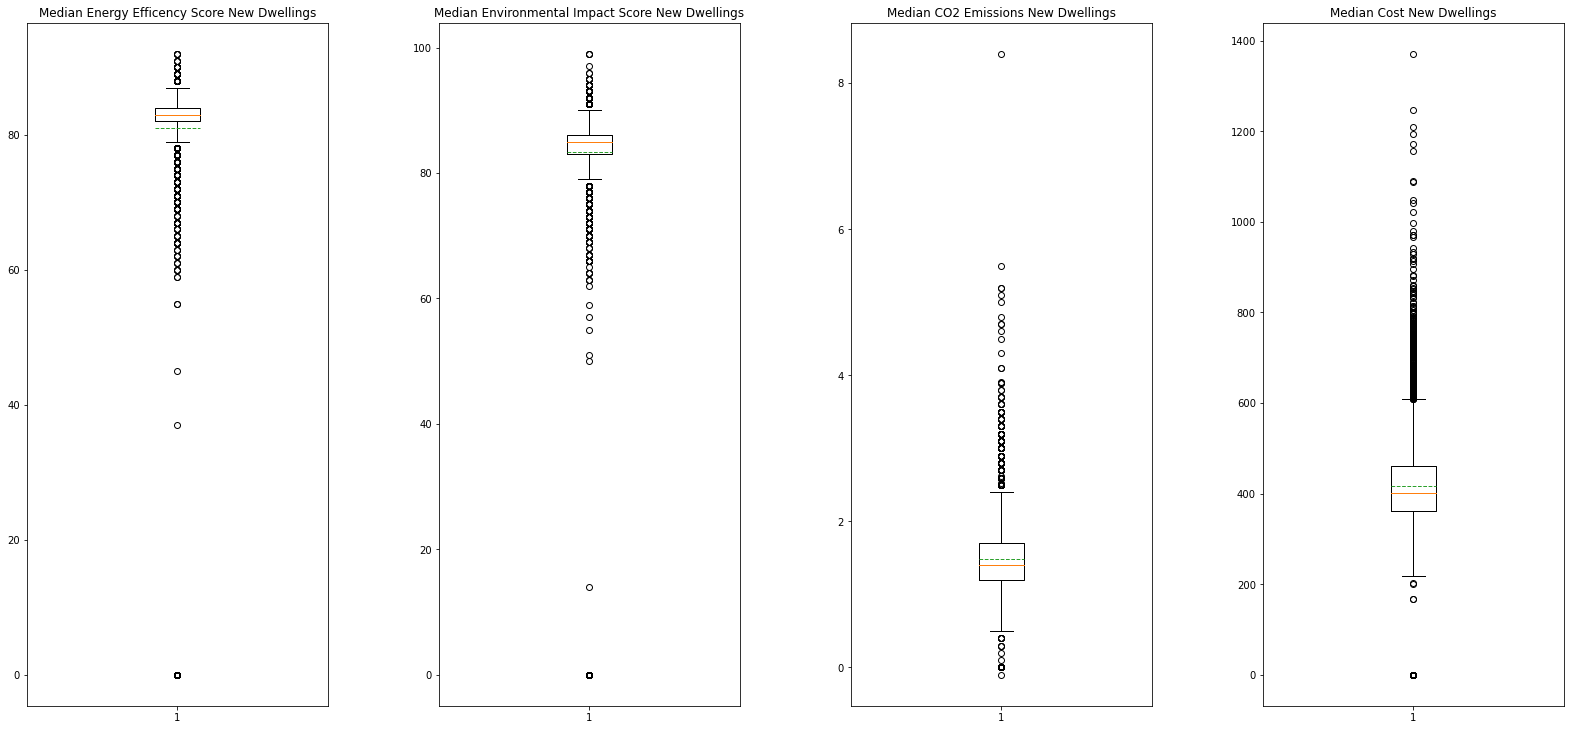

In [16]:
# Look at boxplot of dependent variables

fig1, axs1 = plt.subplots(1, 4,figsize=(24,12))
fig1.tight_layout(pad=8)

axs1[0].boxplot(dfnew['Median Energy Efficency Score New Dwellings'],meanline=True,showmeans=True)
axs1[0].set_title('Median Energy Efficency Score New Dwellings')

axs1[1].boxplot(dfnew['Median Environmental Impact Score New Dwellings'],meanline=True,showmeans=True)
axs1[1].set_title('Median Environmental Impact Score New Dwellings')

axs1[2].boxplot(dfnew['Median CO2 Emissions New Dwellings'],meanline=True,showmeans=True)
axs1[2].set_title('Median CO2 Emissions New Dwellings')

axs1[3].boxplot(dfnew['Median Cost New Dwellings'],meanline=True,showmeans=True)
axs1[3].set_title('Median Cost New Dwellings')


Text(0.5, 1.0, 'Other')

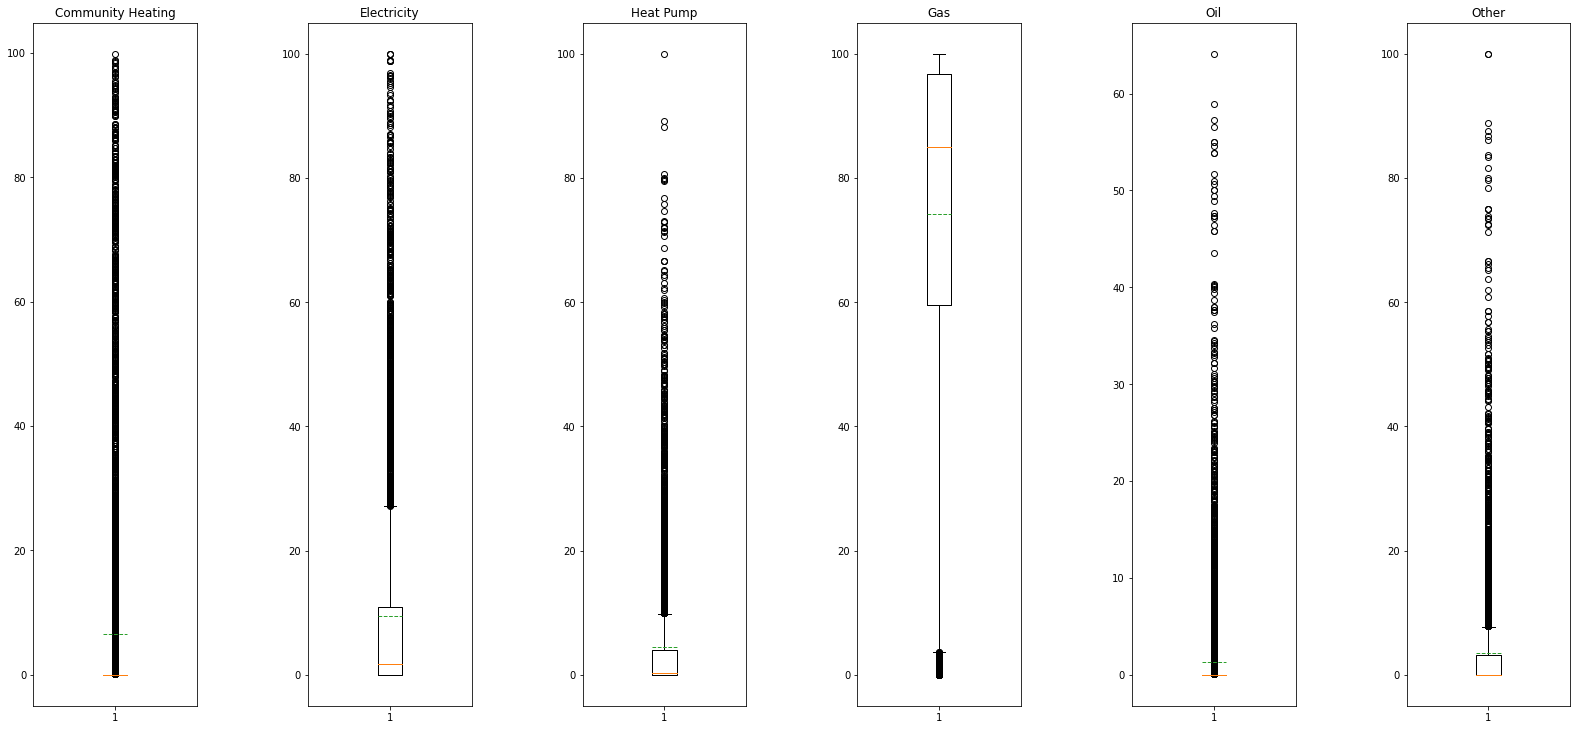

In [17]:
fig2, axs2 = plt.subplots(1, 6,figsize=(24,12))
fig2.tight_layout(pad=8)
    
axs2[0].boxplot(dfnew['New\nCommunity heating scheme'],meanline=True,showmeans=True)
axs2[0].set_title('Community Heating')

axs2[1].boxplot(dfnew['New\nElectricity'],meanline=True,showmeans=True)
axs2[1].set_title('Electricity')

axs2[2].boxplot(dfnew['New\nHeat pump'],meanline=True,showmeans=True)
axs2[2].set_title('Heat Pump')

axs2[3].boxplot(dfnew['New\nMains gas'],meanline=True,showmeans=True)
axs2[3].set_title('Gas')

axs2[4].boxplot(dfnew['New\nOil'],meanline=True,showmeans=True)
axs2[4].set_title('Oil')

axs2[5].boxplot(dfnew['New\nOther or unknown'],meanline=True,showmeans=True)
axs2[5].set_title('Other')

Model 0 - normal variables

In [322]:
dfold.head()

Median Energy Efficency Score Existing Dwellings  \
Middle super output layer (MSOA) code                                                     
E02000001                                                                          68.0   
E02000002                                                                          65.0   
E02000003                                                                          62.0   
E02000004                                                                          64.0   
E02000005                                                                          60.0   

                                       Existing\nhouse  \
Middle super output layer (MSOA) code                    
E02000001                                         47.0   
E02000002                                         63.0   
E02000003                                         58.0   
E02000004                                         63.0   
E02000005                                         60.0   

                                       Existing\nflats and maisonettes  \
Middle super output layer (MSOA) code                                    
E02000001                                                         68.0   
E02000002                                                         66.0   
E02000003                                                         66.0   
E02000004                                                         69.0   
E02000005                                                         62.0   

                                       Median Environmental Impact Score Existing Dwellings  \
Middle super output layer (MSOA) code                                                         
E02000001                                                                           66.0      
E02000002                                                                           61.0      
E02000003                                                                           57.0      
E02000004                                                                           60.0      
E02000005                                                                           56.0      

                                       Median CO2 Emissions Existing Dwellings  \
Middle super output layer (MSOA) code                                            
E02000001                                                                  2.4   
E02000002                                                                  3.2   
E02000003                                                                  3.6   
E02000004                                                                  3.5   
E02000005                                                                  3.7   

                                       Median Cost Existing Dwellings  \
Middle super output layer (MSOA) code                                   
E02000001                                                       541.0   
E02000002                                                       707.0   
E02000003                                                       783.0   
E02000004                                                       780.0   
E02000005                                                       824.0   

                                       Existing\nCommunity heating scheme  \
Middle super output layer (MSOA) code                                       
E02000001                                                           19.71   
E02000002                                                            2.69   
E02000003                                                            0.56   
E02000004                                                            0.00   
E02000005                                                            2.78   

                                       Existing\nElectricity  \
Middle super output layer (MSOA) code                          
E02000001                                             

# Multiple Regression Models for new dwellings

In [294]:
Y = dfnew["Median Cost New Dwellings"]
X = dfnew.loc[:,['New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump', 'New\nMains gas', 'New\nOil', 'New\nOther or unknown']]

X=sm.add_constant(X)

model_0=sm.OLS(Y,X).fit()

model_0.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared:                       0.248
Model:                                   OLS   Adj. R-squared:                  0.247
Method:                        Least Squares   F-statistic:                     394.6
Date:                       Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                               10:49:35   Log-Likelihood:                -43184.
No. Observations:                       7201   AIC:                         8.638e+04
Df Residuals:                           7194   BIC:                         8.643e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0060     17.487      0.000      1.000     -34.274      34.286
New
Community heating scheme     2.8223      0.186     15.197      0.000       2.458       3.186
New
Electricity                  4.6733      0.186     25.117      0.000       4.309       5.038
New
Heat pump                    5.8566      0.218     26.855      0.000       5.429       6.284
New
Mains gas                    4.0575      0.176     23.108      0.000       3.713       4.402
New
Oil                          9.7492      0.317     30.729      0.000       9.127      10.371
New
Other or unknown             4.1107      0.220     18.671      0.000       3.679       4.542
==============================================================================
Omnibus:                     1751.000   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30767.966
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      13.028   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 1 - no constant

In [295]:
Y = dfnew["Median Cost New Dwellings"]
X = dfnew.loc[:,['New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump', 'New\nMains gas', 'New\nOil', 'New\nOther or unknown']]

model_1=sm.OLS(Y,X).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared (uncentered):                   0.949
Model:                                   OLS   Adj. R-squared (uncentered):              0.949
Method:                        Least Squares   F-statistic:                          2.248e+04
Date:                       Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                               10:50:03   Log-Likelihood:                         -43184.
No. Observations:                       7201   AIC:                                  8.638e+04
Df Residuals:                           7195   BIC:                                  8.642e+04
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
New
Community heating scheme     2.8224      0.063     45.123      0.000       2.700       2.945
New
Electricity                  4.6733      0.064     73.545      0.000       4.549       4.798
New
Heat pump                    5.8566      0.130     44.946      0.000       5.601       6.112
New
Mains gas                    4.0576      0.016    255.268      0.000       4.026       4.089
New
Oil                          9.7492      0.265     36.831      0.000       9.230      10.268
New
Other or unknown             4.1108      0.134     30.734      0.000       3.849       4.373
==============================================================================
Omnibus:                     1750.999   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30767.961
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      13.028   Cond. No.                         19.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

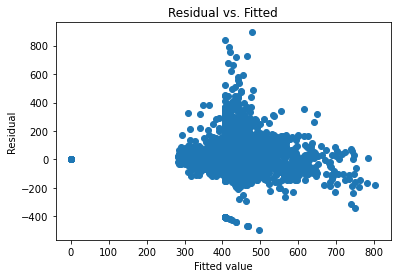

In [21]:
# Check residuals 

# residual plot 
plt.scatter(model_1.fittedvalues, model_1.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

In [298]:
# Check VIF

# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [299]:
X_drop = drop_column_using_vif_(X)

Dropping: New
Mains gas


Model 2 - VIF

In [300]:
# now do the regression again without Main gas, first add a constant
Y2 = dfnew["Median Cost New Dwellings"]
X2 = dfnew.loc[:,['New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump', 'New\nOil', 'New\nOther or unknown']]

X2 = sm.add_constant(X2)

model_2=sm.OLS(Y2,X2).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared:                       0.192
Model:                                   OLS   Adj. R-squared:                  0.191
Method:                        Least Squares   F-statistic:                     341.5
Date:                       Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                               10:50:47   Log-Likelihood:                -43441.
No. Observations:                       7201   AIC:                         8.689e+04
Df Residuals:                           7195   BIC:                         8.694e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          402.4312      1.641    245.280      0.000     399.215     405.647
New
Community heating scheme    -1.1905      0.068    -17.446      0.000      -1.324      -1.057
New
Electricity                  0.6819      0.072      9.514      0.000       0.541       0.822
New
Heat pump                    1.8801      0.139     13.542      0.000       1.608       2.152
New
Oil                          5.7001      0.274     20.795      0.000       5.163       6.237
New
Other or unknown             0.1348      0.142      0.947      0.344      -0.144       0.414
==============================================================================
Omnibus:                     1396.137   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26603.610
Skew:                           0.401   Prob(JB):                         0.00
Kurtosis:                      12.382   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

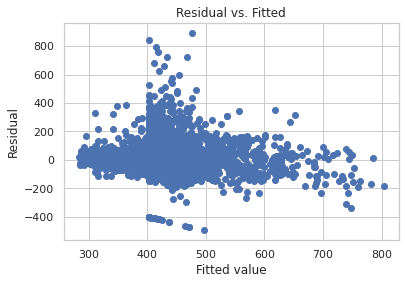

In [301]:
# for residual plot 
plt.scatter(model_2.fittedvalues, model_2.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()


Model 3 - VIF no constant

In [26]:
# if do not add constant

# now do the regression again without Main gas, first add a constant
Y2 = dfnew["Median Cost New Dwellings"]
X2 = dfnew.loc[:,['New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump', 'New\nOil', 'New\nOther or unknown']]

#X2 = sm.add_constant(X2)

model_3=sm.OLS(Y2,X2).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared (uncentered):                   0.491
Model:                                   OLS   Adj. R-squared (uncentered):              0.490
Method:                        Least Squares   F-statistic:                              1387.
Date:                       Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                               11:00:28   Log-Likelihood:                         -51494.
No. Observations:                       7201   AIC:                                  1.030e+05
Df Residuals:                           7196   BIC:                                  1.030e+05
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
New
Community heating scheme     4.2180      0.198     21.348      0.000       3.831       4.605
New
Electricity                  8.6850      0.195     44.484      0.000       8.302       9.068
New
Heat pump                   11.6818      0.407     28.716      0.000      10.884      12.479
New
Oil                          6.7253      0.839      8.020      0.000       5.082       8.369
New
Other or unknown            10.0090      0.418     23.959      0.000       9.190      10.828
==============================================================================
Omnibus:                      884.417   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.500
Skew:                          -0.912   Prob(JB):                    1.46e-283
Kurtosis:                       4.006   Cond. No.                         4.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

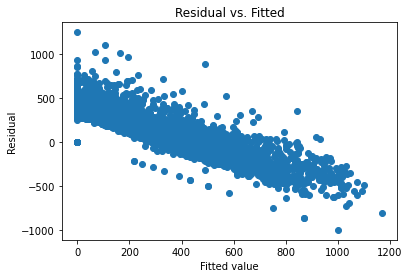

In [27]:
# for residual

plt.scatter(model_3.fittedvalues, model_3.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()


Model 4 - Transformed data

In [28]:
variables = ['New\nCommunity heating scheme', 'New\nElectricity', 'New\nHeat pump', 'New\nOil', 'New\nOther or unknown']


for i in range(5):
   dfnew[variables[i] + '_cbrt'] = np.cbrt(dfnew[variables[i]]) 

dfnew['New\nMains gas_squ']=dfnew['New\nMains gas']**2

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [30]:
Y4 = dfnew["Median Cost New Dwellings"]
X4 = dfnew.loc[:, ['New\nCommunity heating scheme_cbrt', 'New\nElectricity_cbrt',
       'New\nHeat pump_cbrt', 'New\nOil_cbrt', 'New\nOther or unknown_cbrt',
       'New\nMains gas_squ']]

X4 = sm.add_constant(X4)

model_4=sm.OLS(Y4,X4).fit()

model_4.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared:                       0.225
Model:                                   OLS   Adj. R-squared:                  0.224
Method:                        Least Squares   F-statistic:                     347.8
Date:                       Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                               11:00:29   Log-Likelihood:                -43291.
No. Observations:                       7201   AIC:                         8.660e+04
Df Residuals:                           7194   BIC:                         8.664e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               324.3192      7.349     44.129      0.000     309.912     338.726
New
Community heating scheme_cbrt    -8.7722      1.334     -6.576      0.000     -11.387      -6.157
New
Electricity_cbrt                 18.1305      1.326     13.677      0.000      15.532      20.729
New
Heat pump_cbrt                   22.8951      1.470     15.576      0.000      20.014      25.777
New
Oil_cbrt                         42.5728      2.153     19.776      0.000      38.353      46.793
New
Other or unknown_cbrt             9.5806      1.433      6.686      0.000       6.772      12.390
New
Mains gas_squ                     0.0053      0.001      7.819      0.000       0.004       0.007
==============================================================================
Omnibus:                     1822.047   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26322.078
Skew:                           0.812   Prob(JB):                         0.00
Kurtosis:                      12.224   Cond. No.                     4.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 5 - transformed no constant

In [31]:
Y5 = dfnew["Median Cost New Dwellings"]
X5 = dfnew.loc[:, ['New\nCommunity heating scheme_cbrt', 'New\nElectricity_cbrt',
       'New\nHeat pump_cbrt', 'New\nOil_cbrt', 'New\nOther or unknown_cbrt',
       'New\nMains gas_squ']]


model_5=sm.OLS(Y5,X5).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared (uncentered):                   0.934
Model:                                   OLS   Adj. R-squared (uncentered):              0.934
Method:                        Least Squares   F-statistic:                          1.689e+04
Date:                       Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                               11:00:29   Log-Likelihood:                         -44154.
No. Observations:                       7201   AIC:                                  8.832e+04
Df Residuals:                           7195   BIC:                                  8.836e+04
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
New
Community heating scheme_cbrt    33.4350      1.048     31.899      0.000      31.380      35.490
New
Electricity_cbrt                 63.7432      0.935     68.139      0.000      61.909      65.577
New
Heat pump_cbrt                   49.7475      1.508     32.984      0.000      46.791      52.704
New
Oil_cbrt                         53.4459      2.411     22.171      0.000      48.720      58.171
New
Other or unknown_cbrt            37.3179      1.451     25.711      0.000      34.473      40.163
New
Mains gas_squ                     0.0340      0.000    152.568      0.000       0.034       0.034
==============================================================================
Omnibus:                     1760.723   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10664.725
Skew:                           1.031   Prob(JB):                         0.00
Kurtosis:                       8.594   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

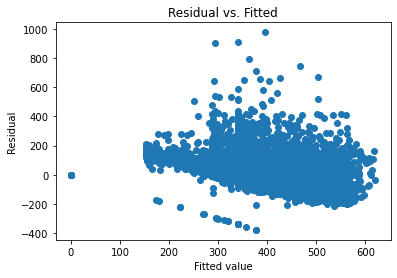

In [32]:
plt.scatter(model_5.fittedvalues, model_5.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()


Model 6 - transformed with VIF

In [33]:
Y6 = dfnew["Median Cost New Dwellings"]
X6 = dfnew.loc[:, ['New\nCommunity heating scheme_cbrt', 'New\nElectricity_cbrt',
       'New\nHeat pump_cbrt', 'New\nOther or unknown_cbrt',
       'New\nMains gas_squ']]

X6 = sm.add_constant(X6)

model_6=sm.OLS(Y6,X6).fit()

model_6.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Median Cost New Dwellings   R-squared:                       0.183
Model:                                   OLS   Adj. R-squared:                  0.182
Method:                        Least Squares   F-statistic:                     321.8
Date:                       Thu, 09 Dec 2021   Prob (F-statistic):          6.63e-312
Time:                               11:00:30   Log-Likelihood:                -43482.
No. Observations:                       7201   AIC:                         8.698e+04
Df Residuals:                           7195   BIC:                         8.702e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               340.9533      7.496     45.483      0.000     326.258     355.648
New
Community heating scheme_cbrt   -13.8434      1.344    -10.299      0.000     -16.478     -11.209
New
Electricity_cbrt                 14.9802      1.351     11.087      0.000      12.332      17.629
New
Heat pump_cbrt                   35.6066      1.357     26.234      0.000      32.946      38.267
New
Other or unknown_cbrt            16.2820      1.429     11.390      0.000      13.480      19.084
New
Mains gas_squ                     0.0034      0.001      4.862      0.000       0.002       0.005
==============================================================================
Omnibus:                     1502.889   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18333.321
Skew:                           0.647   Prob(JB):                         0.00
Kurtosis:                      10.709   Cond. No.                     4.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
Y7 = dfnew["Median Cost New Dwellings"]
X7 = dfnew.loc[:, ['New\nCommunity heating scheme_cbrt', 'New\nElectricity_cbrt',
       'New\nHeat pump_cbrt', 'New\nOther or unknown_cbrt',
       'New\nMains gas_squ']]

model_7=sm.OLS(Y7,X7).fit()

model_7.summary()

KeyError: "None of [Index(['New\\nCommunity heating scheme_cbrt', 'New\\nElectricity_cbrt',\n       'New\\nHeat pump_cbrt', 'New\\nOther or unknown_cbrt',\n       'New\\nMains gas_squ'],\n      dtype='object')] are in the [columns]"

In [292]:
models = [model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7]

for m in models:
    print("Model")
    print("gradient  =", m.params[1])
    print("intercept =", m.params[0])
    print("Rsquared  =", m.rsquared)
    print("MSE       =", m.mse_resid)
    print("pvalue    =", m.f_pvalue)
    if m.f_pvalue<=0.05:
        print("sig")
    print("Next model")

NameError: name 'model_1' is not defined

## Plotting Map for Presentation

In [ ]:
#Find points
points = df["Local authority district code"].unique()

In [ ]:
#read in shapefiles and merge to create geodataframe

msoas = gpd.read_file('Middle_Layer_Super_Output_Areas_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp')
msoas = msoas.rename(columns={'msoa11cd':'Middle super output layer (MSOA) code'})
regions = gpd.read_file('NUTS_Level_1_(January_2018)_Boundaries.shp')
gdf = pd.merge(msoas, df, on = 'Middle super output layer (MSOA) code', how = 'right')

In [ ]:
# Read in shapefile and filter

auth = gpd.read_file("LAD_MAY_2021_UK_BFE_V2.shp")
auth = auth.rename(columns={"LAD21CD":"Local authority district code"})
auth = auth[auth['Local authority district code'].isin(points)] 

In [ ]:
#Plot and save map

fig, ax = plt.subplots(1, figsize=(20,20))
ax.axis("off")
ax.set_aspect('equal')
gdf.boundary.plot(ax=ax, facecolor=None, edgecolor="Orange", linewidth=1.5)
auth.boundary.plot(ax=ax, edgecolor="grey", linewidth=2)
plt.savefig("map", transparent=True)

## Histograms

In [273]:
# Rename columns

df=df.rename(columns={"Median Energy Efficency Score":"Median Energy Efficiency Score", "Median Environmenal Impact Score":"Median Environmental Impact Score"})
df = df.rename(columns={"Percentage above C":"Percentage of Dwellings Above EPC Band C"})
df = df.rename(columns={"Percentage of Dwellings Above EPC Band C":"Percentage of Dwellings Above EPC Band C (%)"})

No handles with labels found to put in legend.


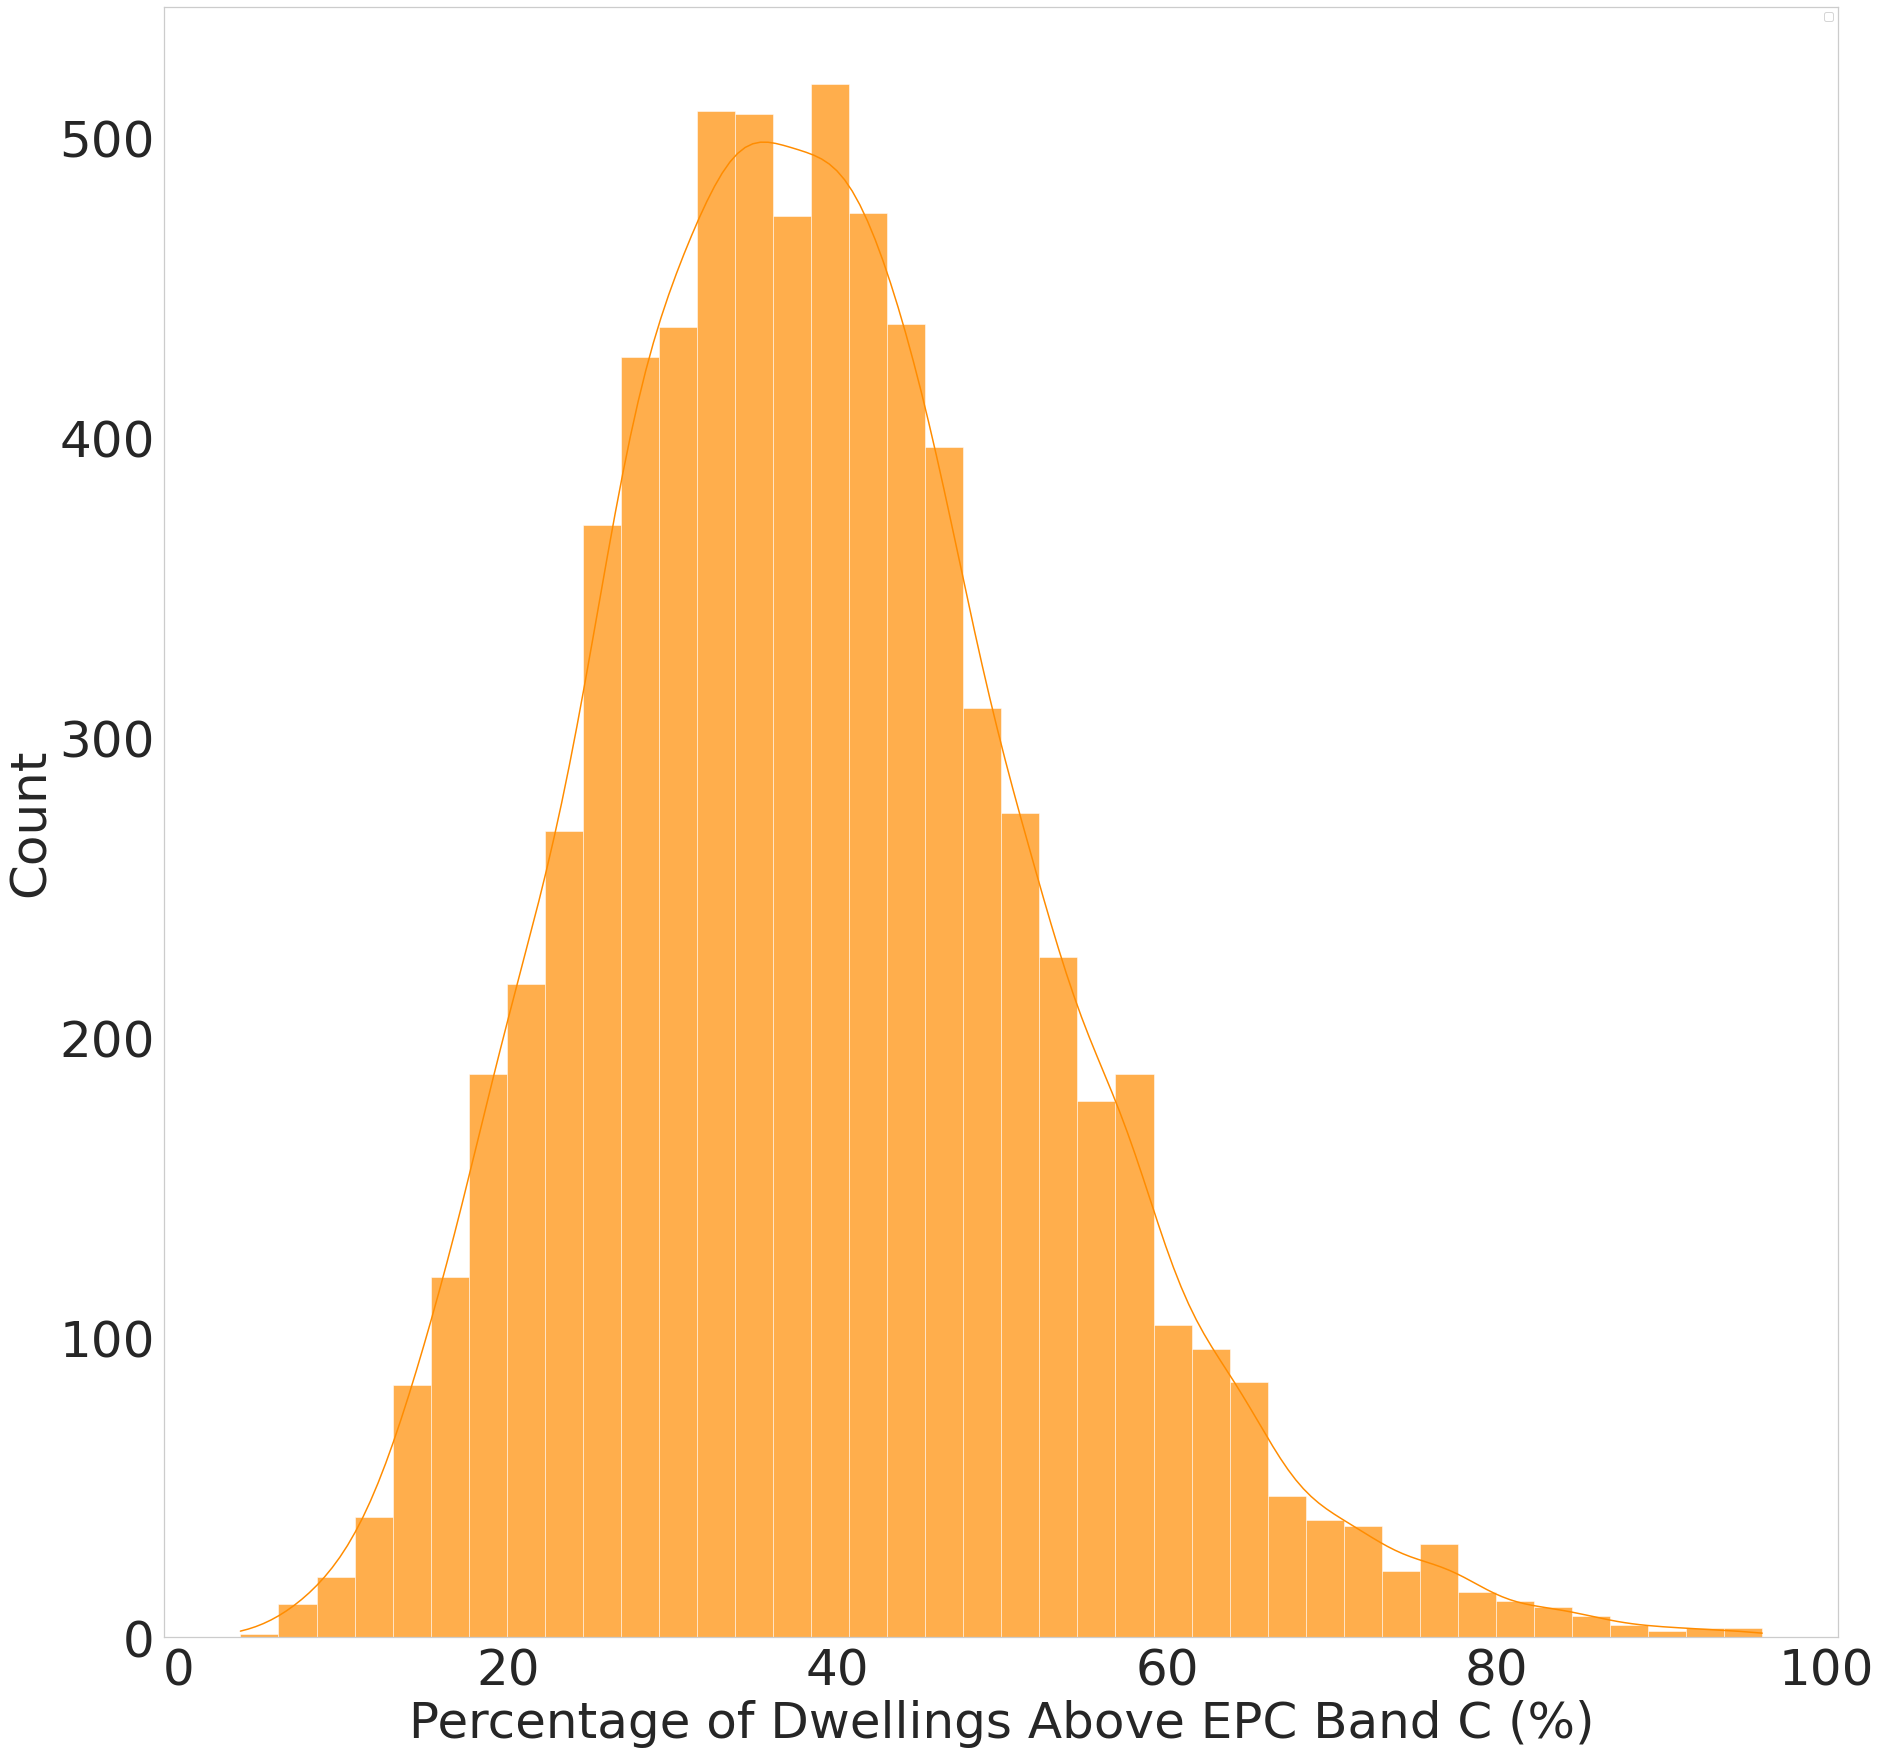

In [359]:
# Plot for EPC above C

fig, axs = plt.subplots(1, figsize=(30,30))
sns.set(style="whitegrid")

sns.histplot(data=df, x="Percentage of Dwellings Above EPC Band C (%)", kde=True, legend = True, color="darkorange", linewidth=0.5, alpha=0.7, bins=40)
#plt.axvline(x=37.98, color='gray', linestyle='dashed', linewidth=10)

axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

axs.grid()
plt.legend() 
plt.show()
fig.savefig("abovec", transparent=True)


No handles with labels found to put in legend.


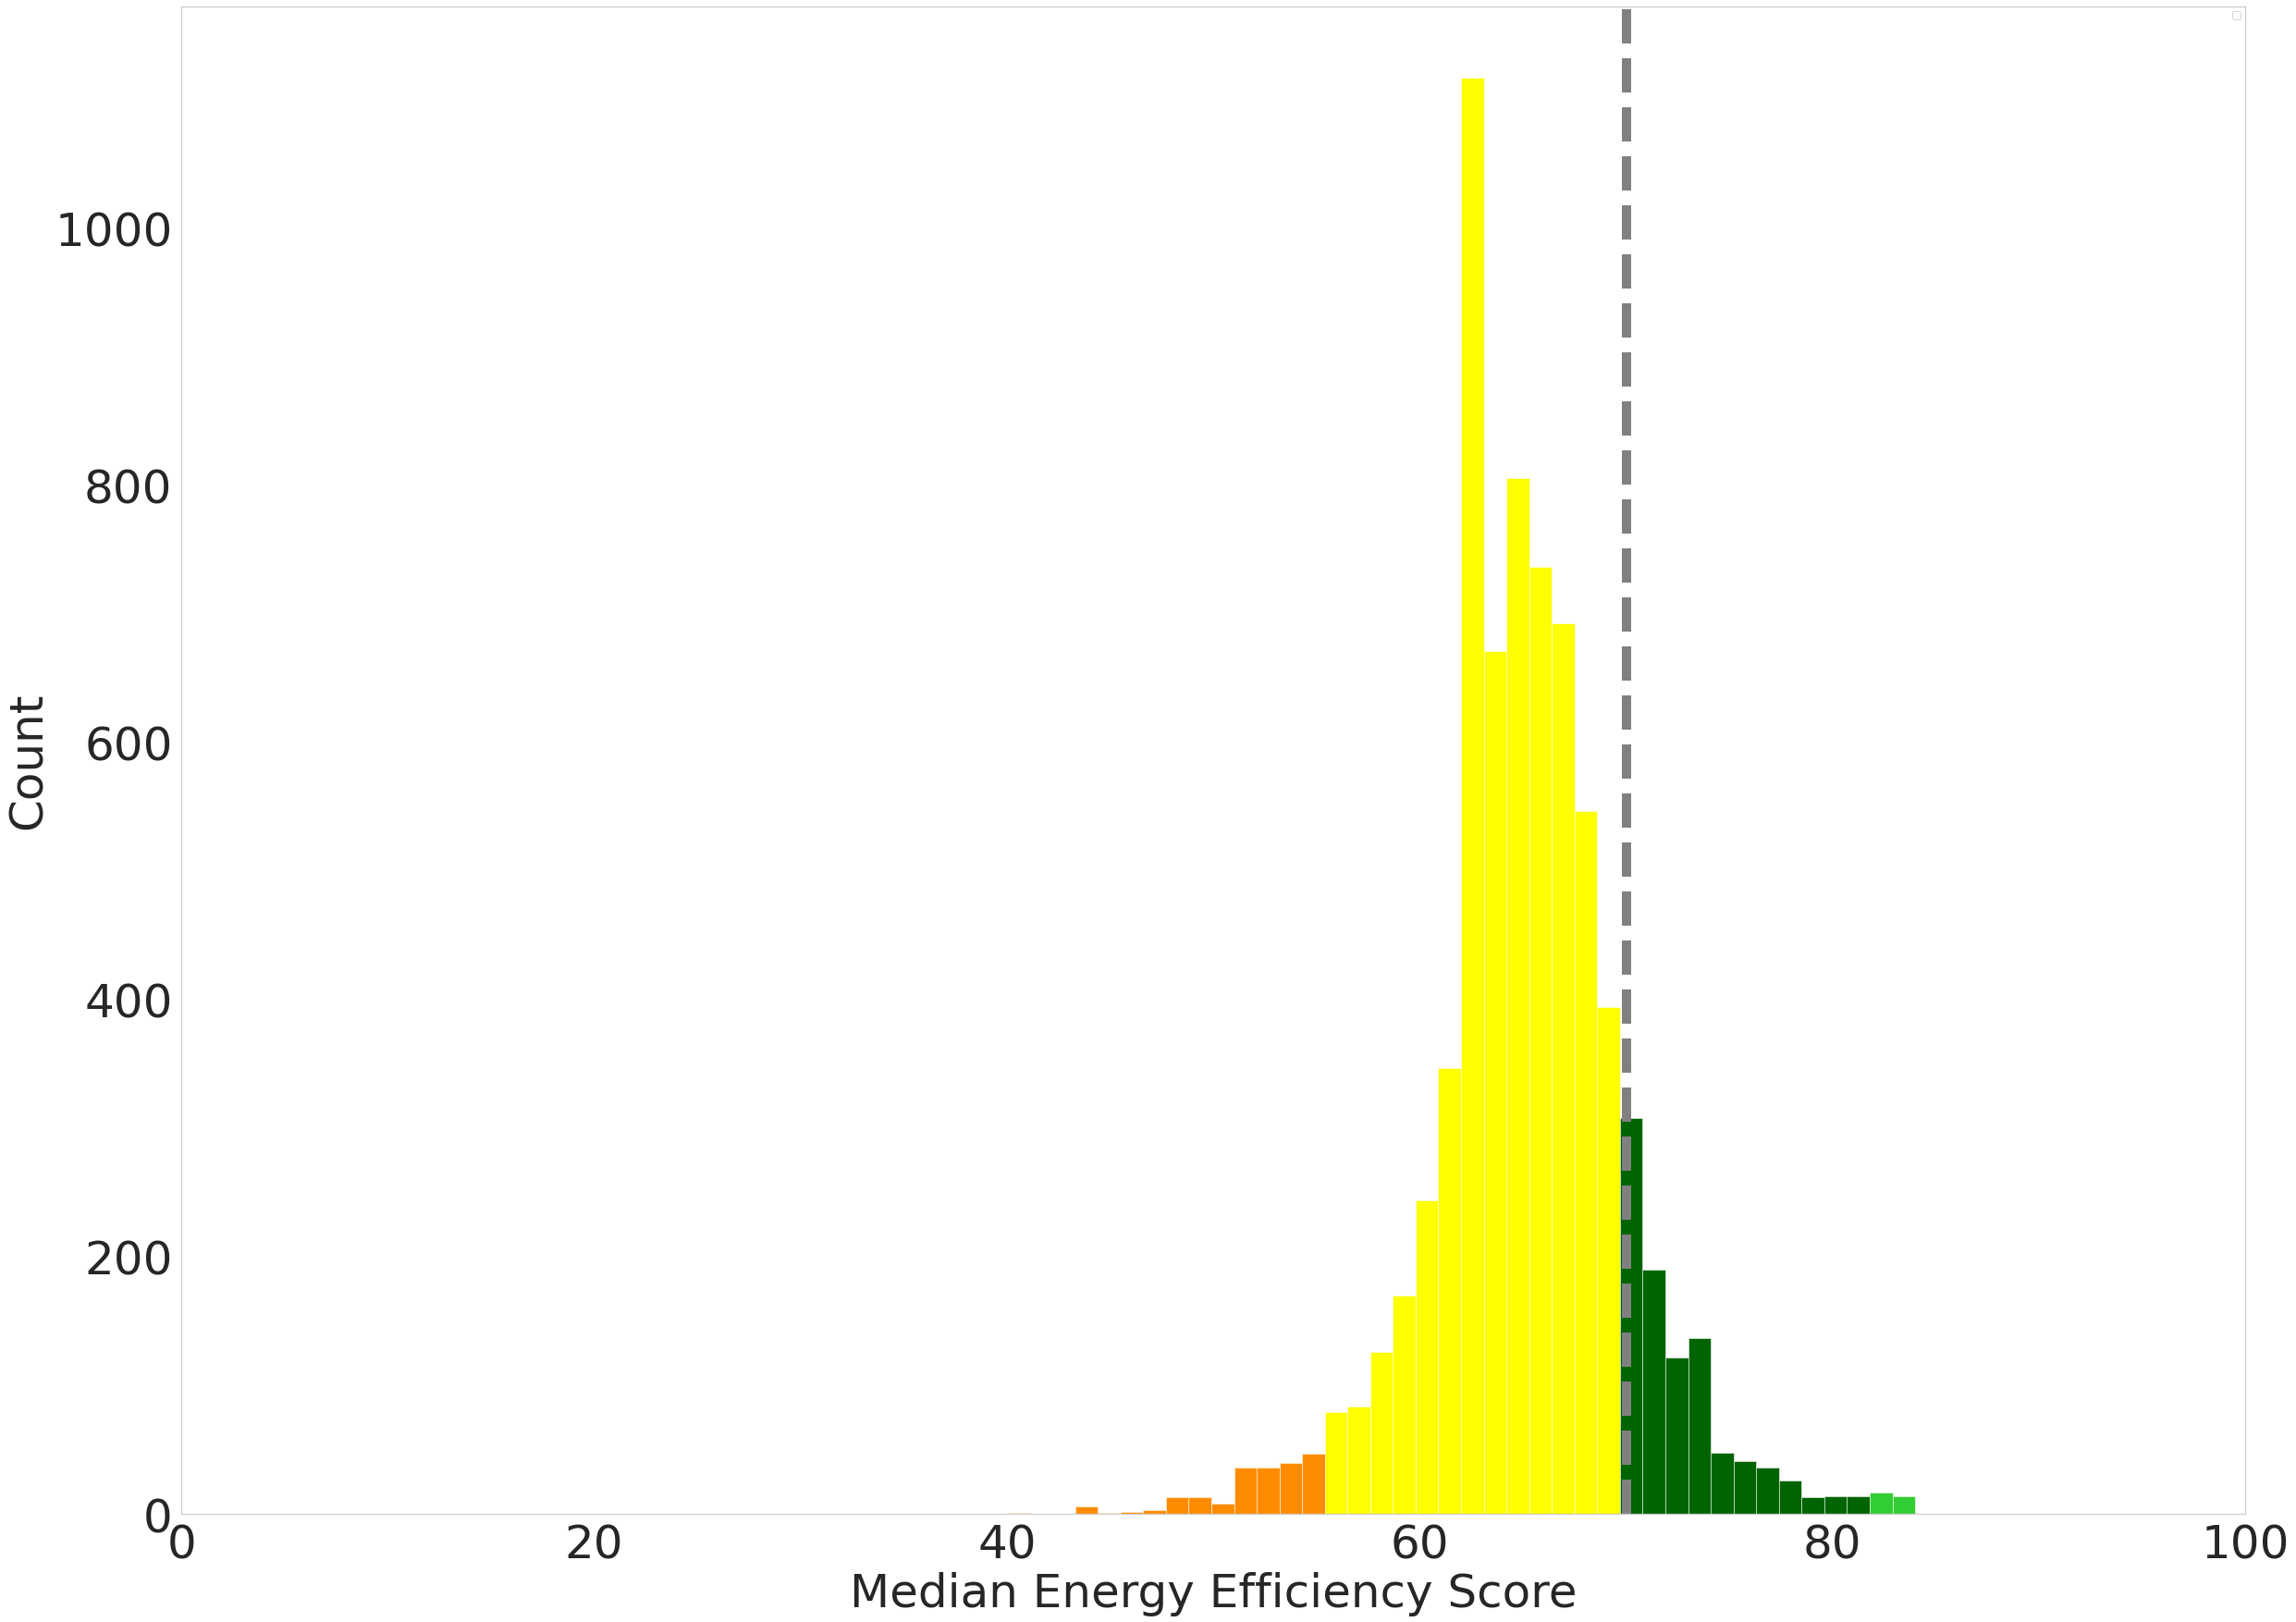

In [275]:
# Plot Enerfy Efficinecy score

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=df, x="Median Energy Efficiency Score", bins=40,edgecolor="white", kde=False, legend = False,linewidth=0.5, alpha=0.7)

for rectangle in axs.patches:
    if 40<= rectangle.get_x() <= 54.9 :
        rectangle.set_facecolor('darkorange')
    if 55<= rectangle.get_x() <= 68.9 :
        rectangle.set_facecolor('yellow')
    if 69<= rectangle.get_x() <= 80.9 :
        rectangle.set_facecolor('darkgreen')
    if 81<= rectangle.get_x() <= 91.9 :
        rectangle.set_facecolor('limegreen')
    if 92<= rectangle.get_x() <= 100.9:
        rectangle.set_facecolor('limegreen')
        
plt.axvline(x=70, color='gray', linestyle='dashed', linewidth=10)
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.set_xlim(0,100)
axs.grid()
plt.legend() 
plt.show()
fig.savefig("effscore", transparent=True)

No handles with labels found to put in legend.


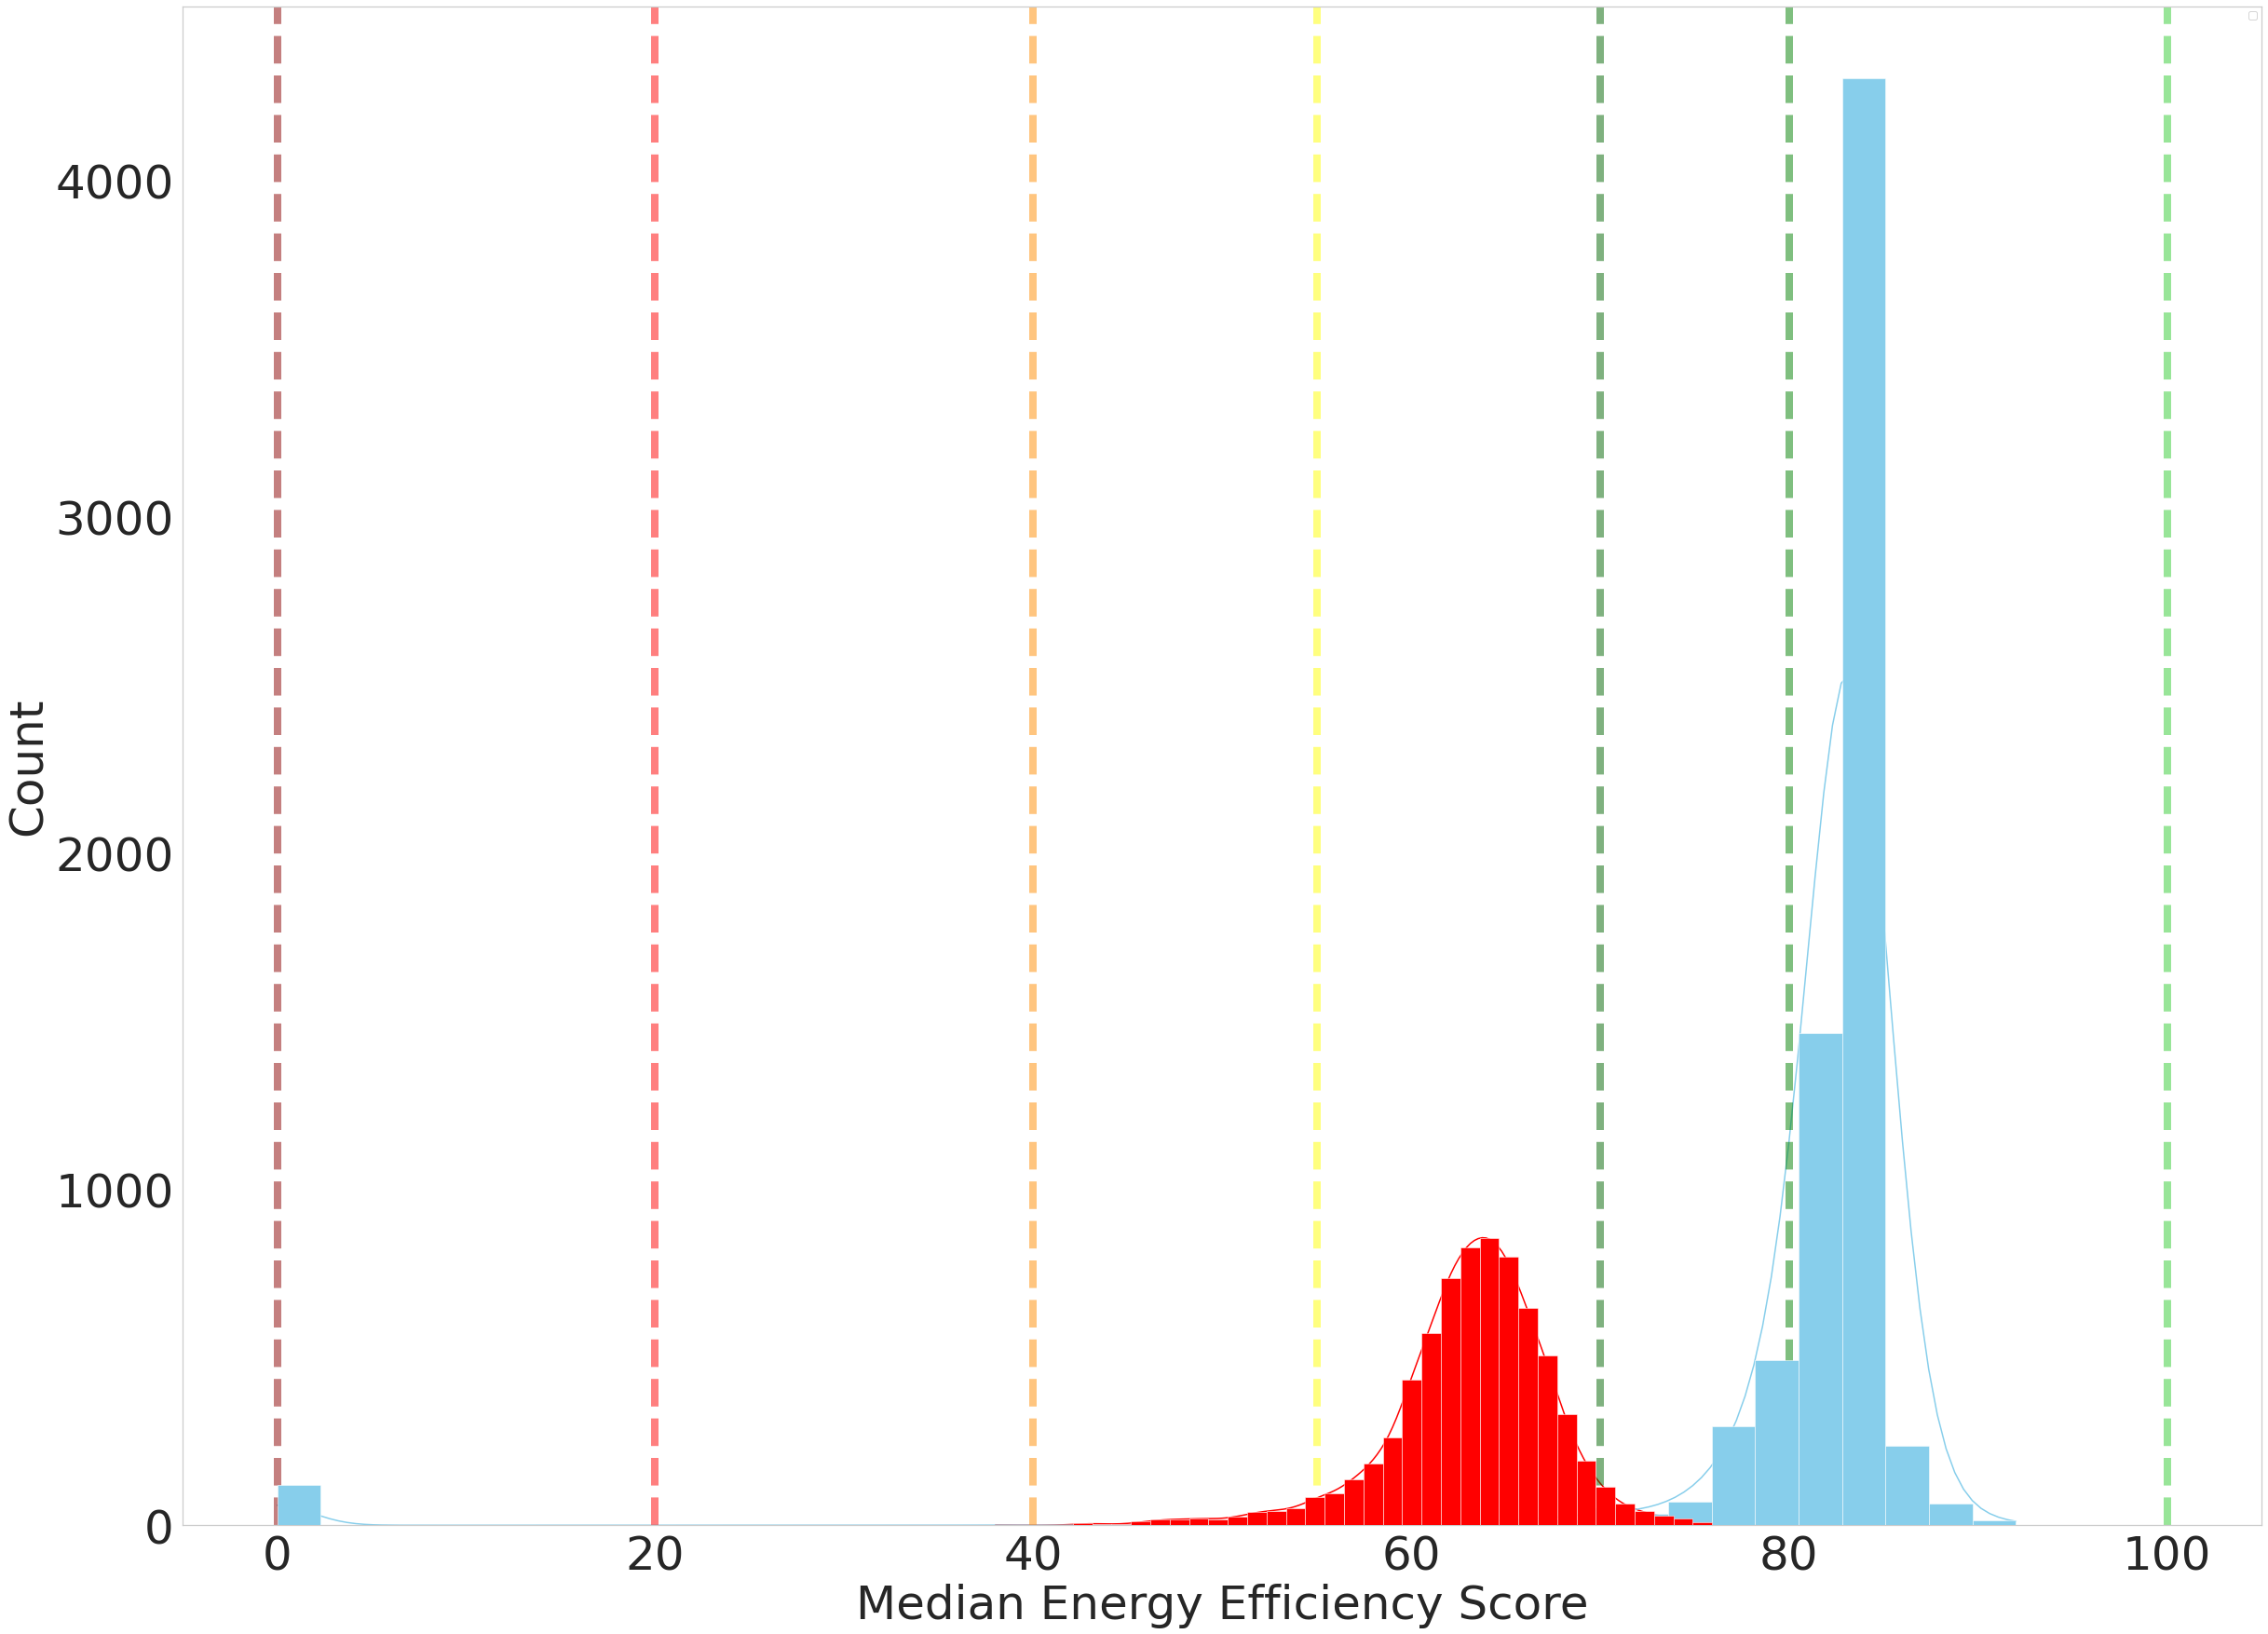

In [280]:
# Plot Enerfy Efficnecy existing and new

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=dfold, x="Median Energy Efficency Score Existing Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5,color="red", zorder=11, alpha=1)
sns.histplot(data=dfnew, x="Median Energy Efficency Score New Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5, color="skyblue",zorder=10, alpha=1)


plt.axvline(x=0, color='darkred', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=20, color='red', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=40, color='darkorange', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=55, color='yellow', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=70, color='darkgreen', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=80, color='green', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=100, color='limegreen', linestyle='dashed', linewidth=8, alpha=0.5)

axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.set_xlabel("Median Energy Efficiency Score")
axs.grid()
plt.legend() 
plt.show()
fig.savefig("effscoreoldnew", transparent=True)

No handles with labels found to put in legend.


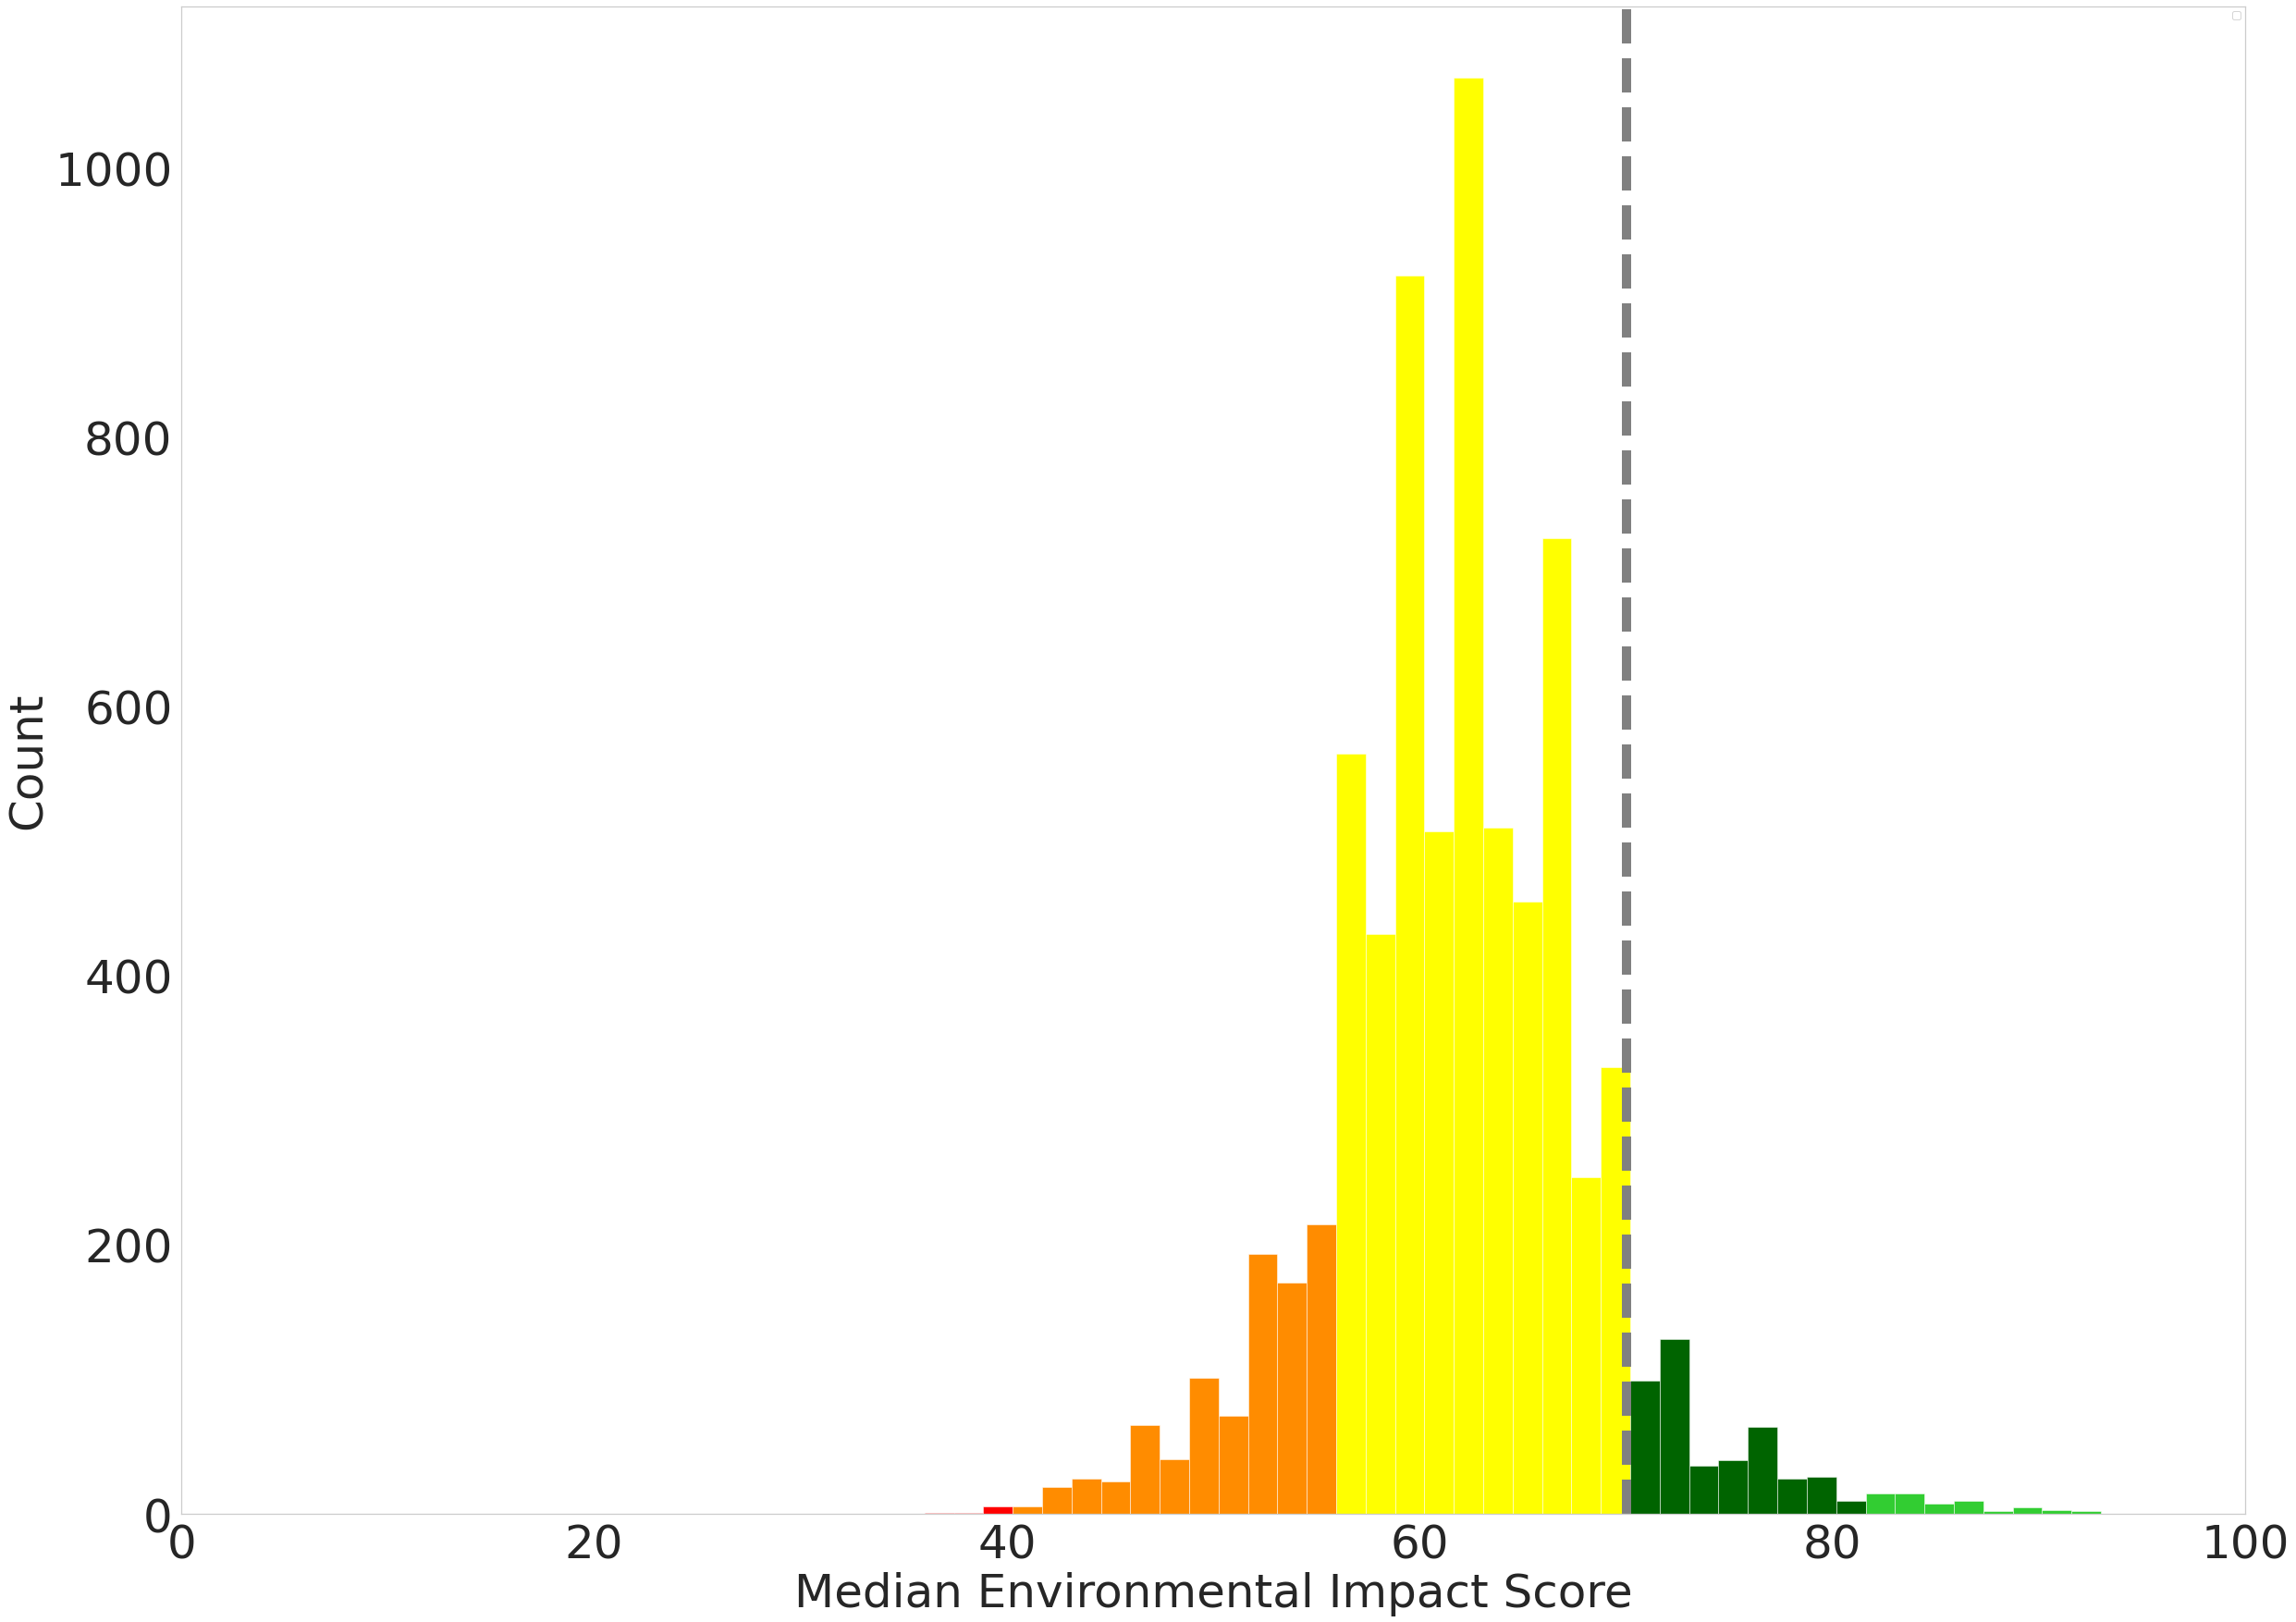

In [281]:
# Impact score

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=df, x="Median Environmental Impact Score", bins=40,edgecolor="white", kde=False, legend = False,linewidth=0.5, alpha=0.7)

for rectangle in axs.patches:
    if 21<= rectangle.get_x() <= 39.9:
        rectangle.set_facecolor("red")
    if 40<= rectangle.get_x() <= 54.9 :
        rectangle.set_facecolor('darkorange')
    if 55<= rectangle.get_x() <= 68.9 :
        rectangle.set_facecolor('yellow')
    if 69<= rectangle.get_x() <= 80.9 :
        rectangle.set_facecolor('darkgreen')
    if 81<= rectangle.get_x() <= 91.9 :
        rectangle.set_facecolor('limegreen')
    if 92<= rectangle.get_x() <= 100.9:
        rectangle.set_facecolor('limegreen')
        
plt.axvline(x=70, color='gray', linestyle='dashed', linewidth=10)
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.set_xlim(0,100)
axs.grid()
plt.legend() 
plt.show()
fig.savefig("impscore", transparent=True)

No handles with labels found to put in legend.


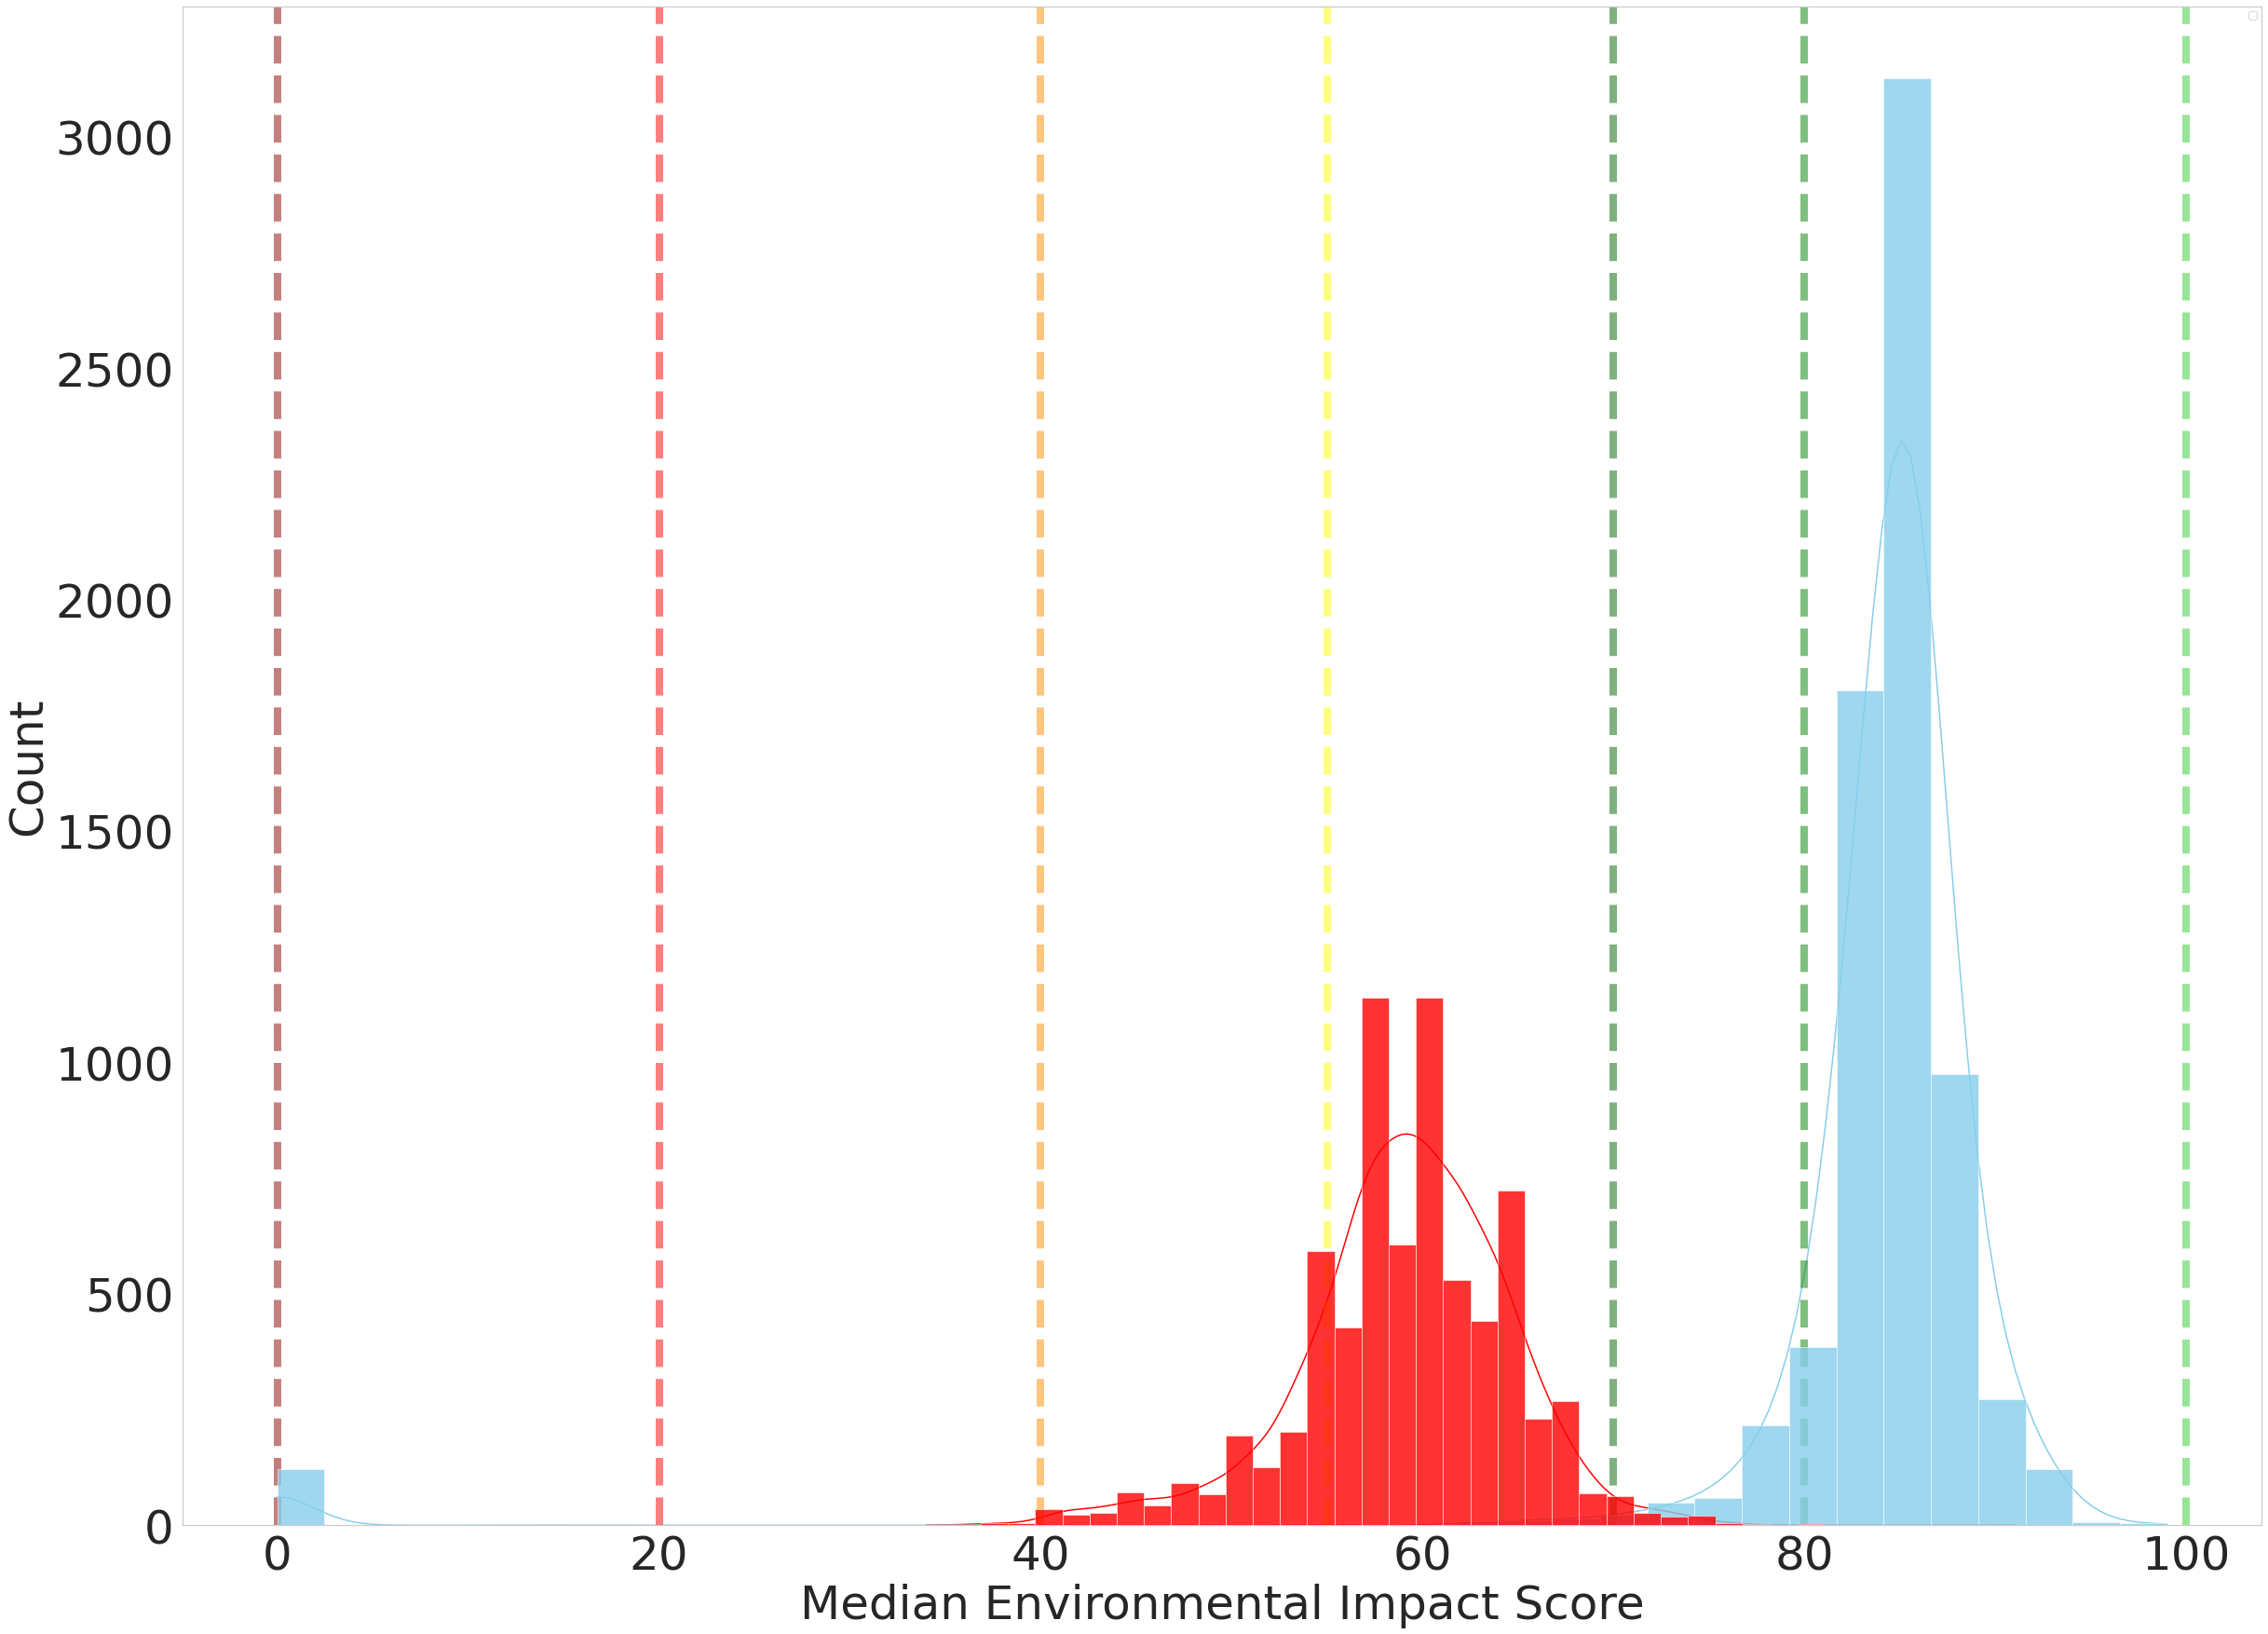

In [282]:
# Plot impact score existing and new 

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=dfold, x="Median Environmental Impact Score Existing Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5,color="red", zorder=11, alpha=0.8)
sns.histplot(data=dfnew, x="Median Environmental Impact Score New Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5, color="skyblue",zorder=10, alpha=0.8)


plt.axvline(x=0, color='darkred', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=20, color='red', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=40, color='darkorange', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=55, color='yellow', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=70, color='darkgreen', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=80, color='green', linestyle='dashed', linewidth=8, alpha=0.5)
plt.axvline(x=100, color='limegreen', linestyle='dashed', linewidth=8, alpha=0.5)

axs.set_xlabel("Median Environmental Impact Score")

axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

axs.grid()
plt.legend() 
plt.show()
fig.savefig("impscoreeoldnew", transparent=True)

In [206]:
# plot co2 emissions

df = df.rename(columns={"Median CO2 Emsissions":"Median Carbon Dioxide Emissions (Tonnes/Year)"})

No handles with labels found to put in legend.


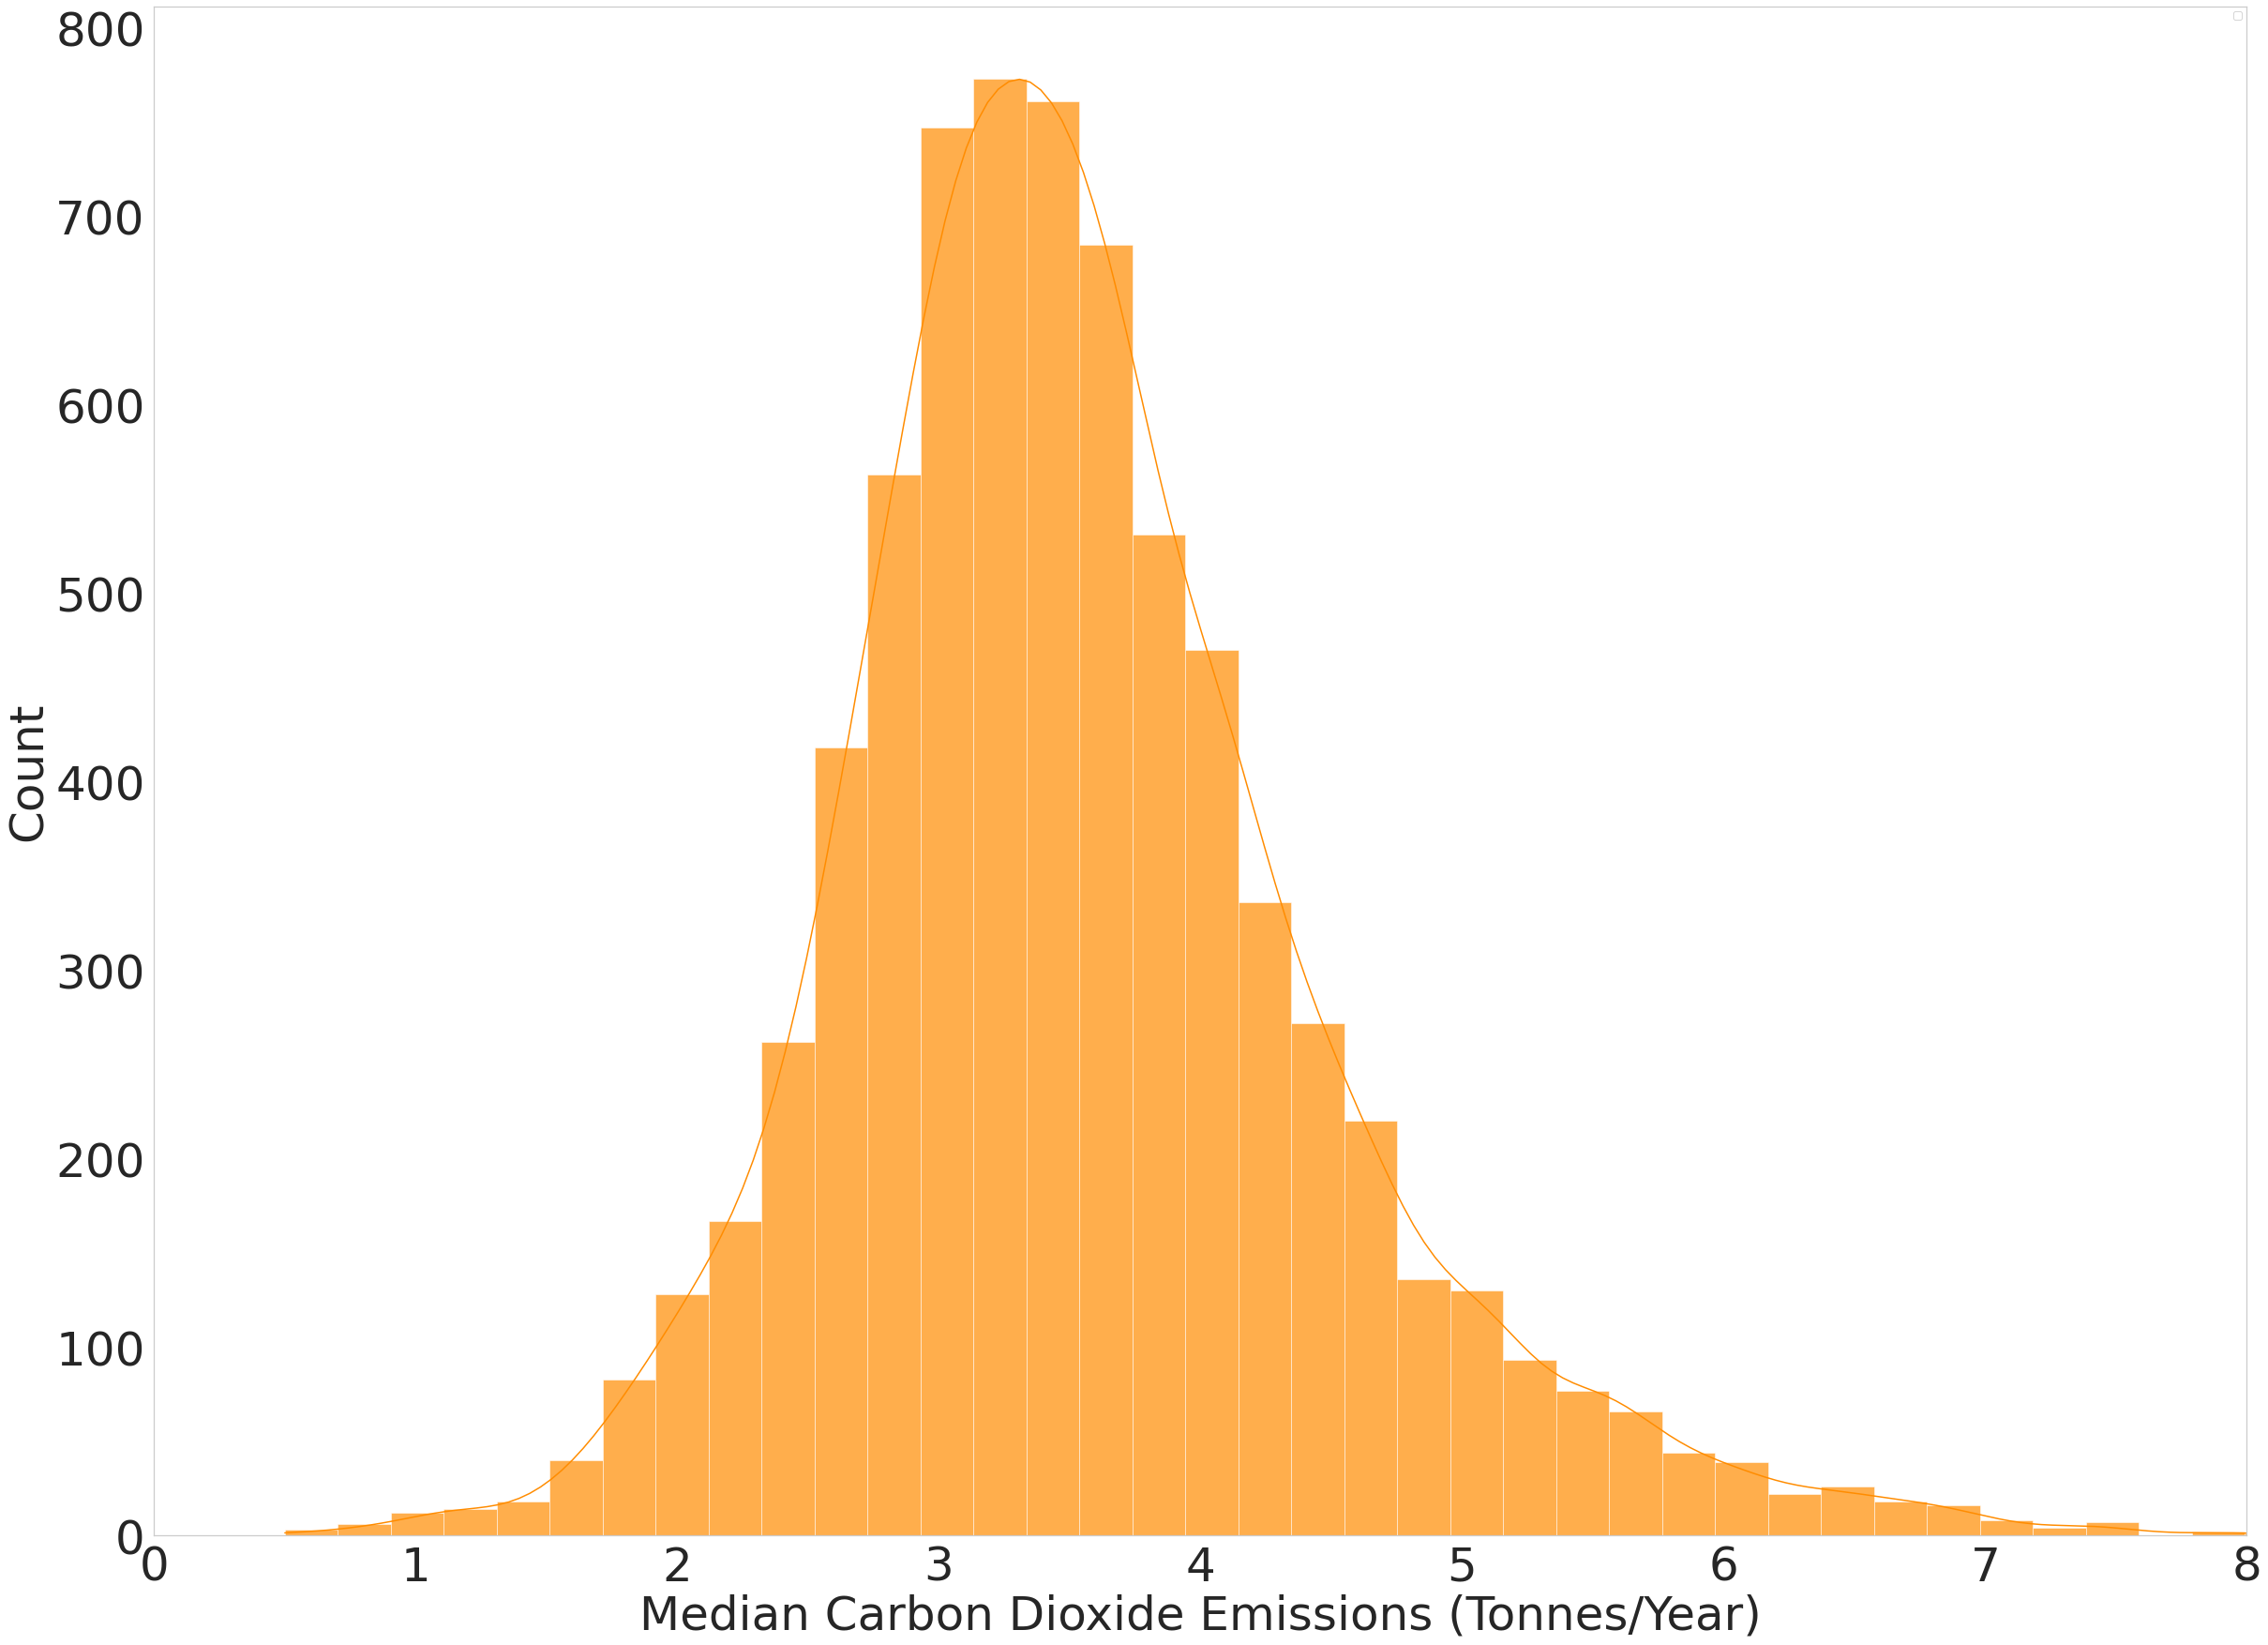

In [209]:
# CO2 Emissions
fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=df, x="Median Carbon Dioxide Emissions (Tonnes/Year)", kde=True, legend = True, color="darkorange", linewidth=0.5, alpha=0.7, bins=40)
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.grid()
axs.set_xlim(0,8)

plt.legend() 
plt.show()
fig.savefig("co2", transparent=True)

No handles with labels found to put in legend.


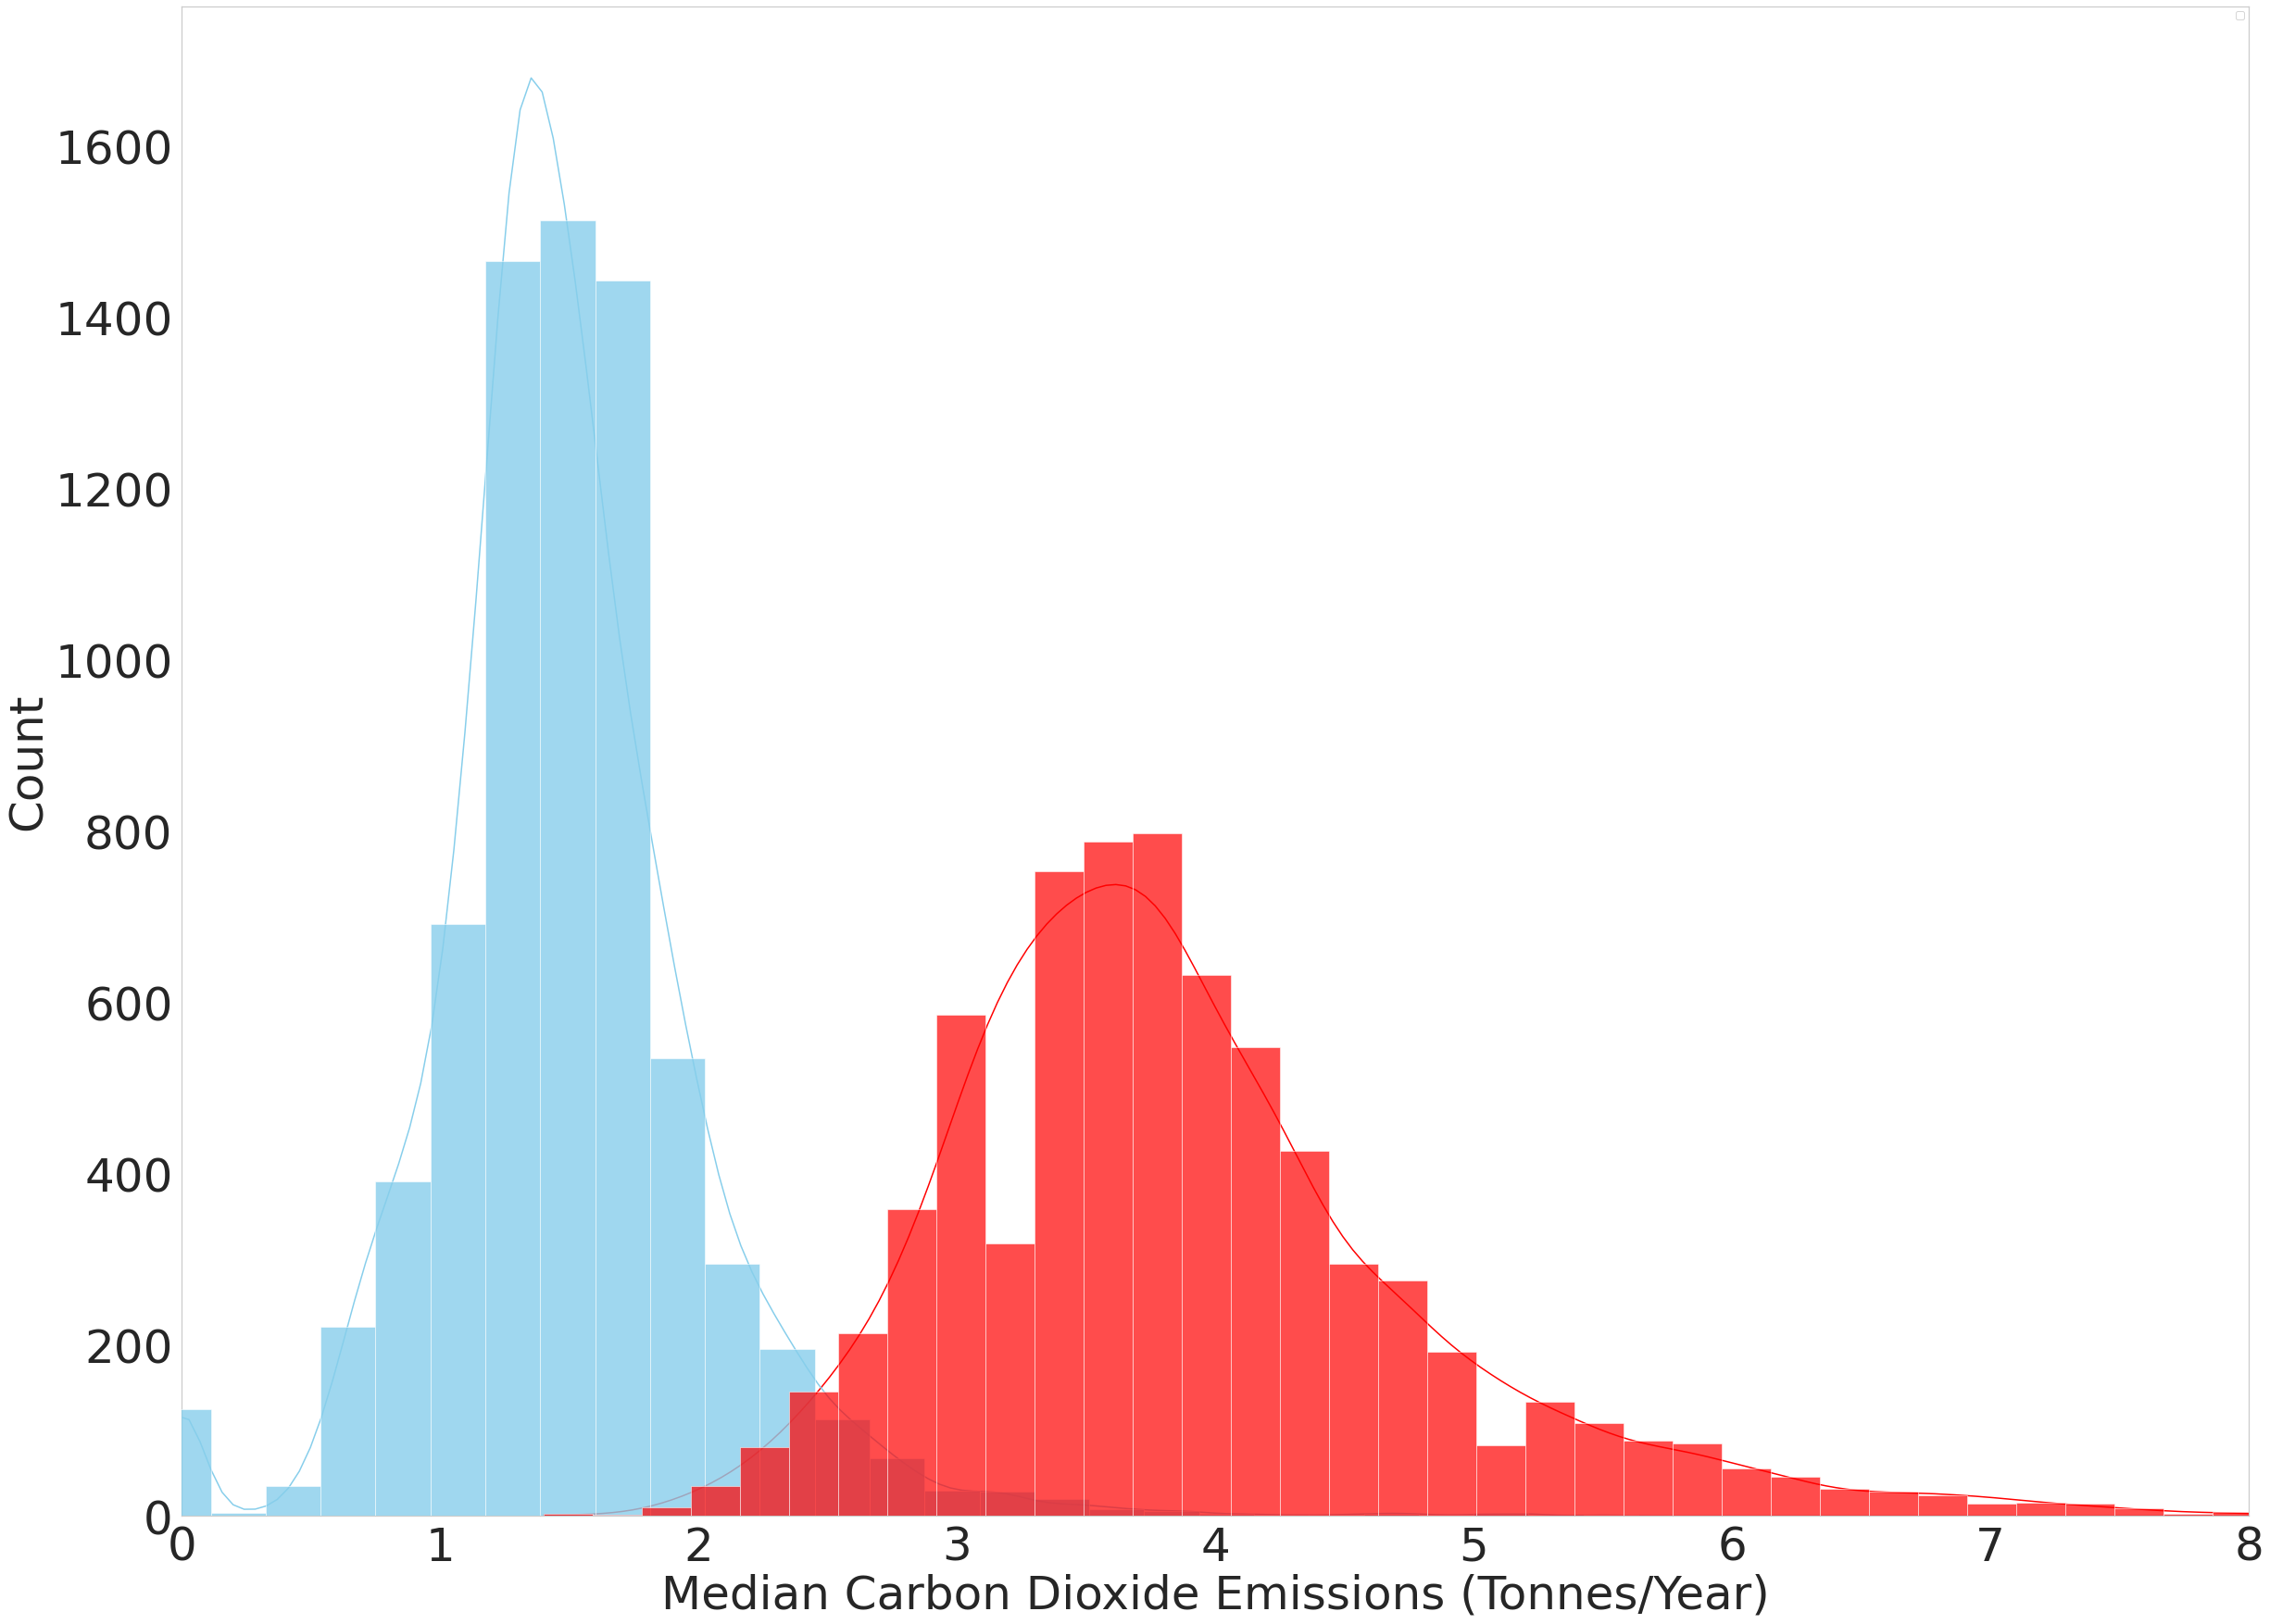

In [283]:
# Plot emissions score existing and new 

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=dfold, x="Median CO2 Emissions Existing Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5,color="red", zorder=11, alpha=0.7)
sns.histplot(data=dfnew, x="Median CO2 Emissions New Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5, color="skyblue",zorder=10, alpha=0.8)

axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.set_xlim(0,8)
axs.set_xlabel("Median Carbon Dioxide Emissions (Tonnes/Year)")

axs.grid()
plt.legend() 
plt.show()
fig.savefig("co2oldandnew", transparent=True)

No handles with labels found to put in legend.


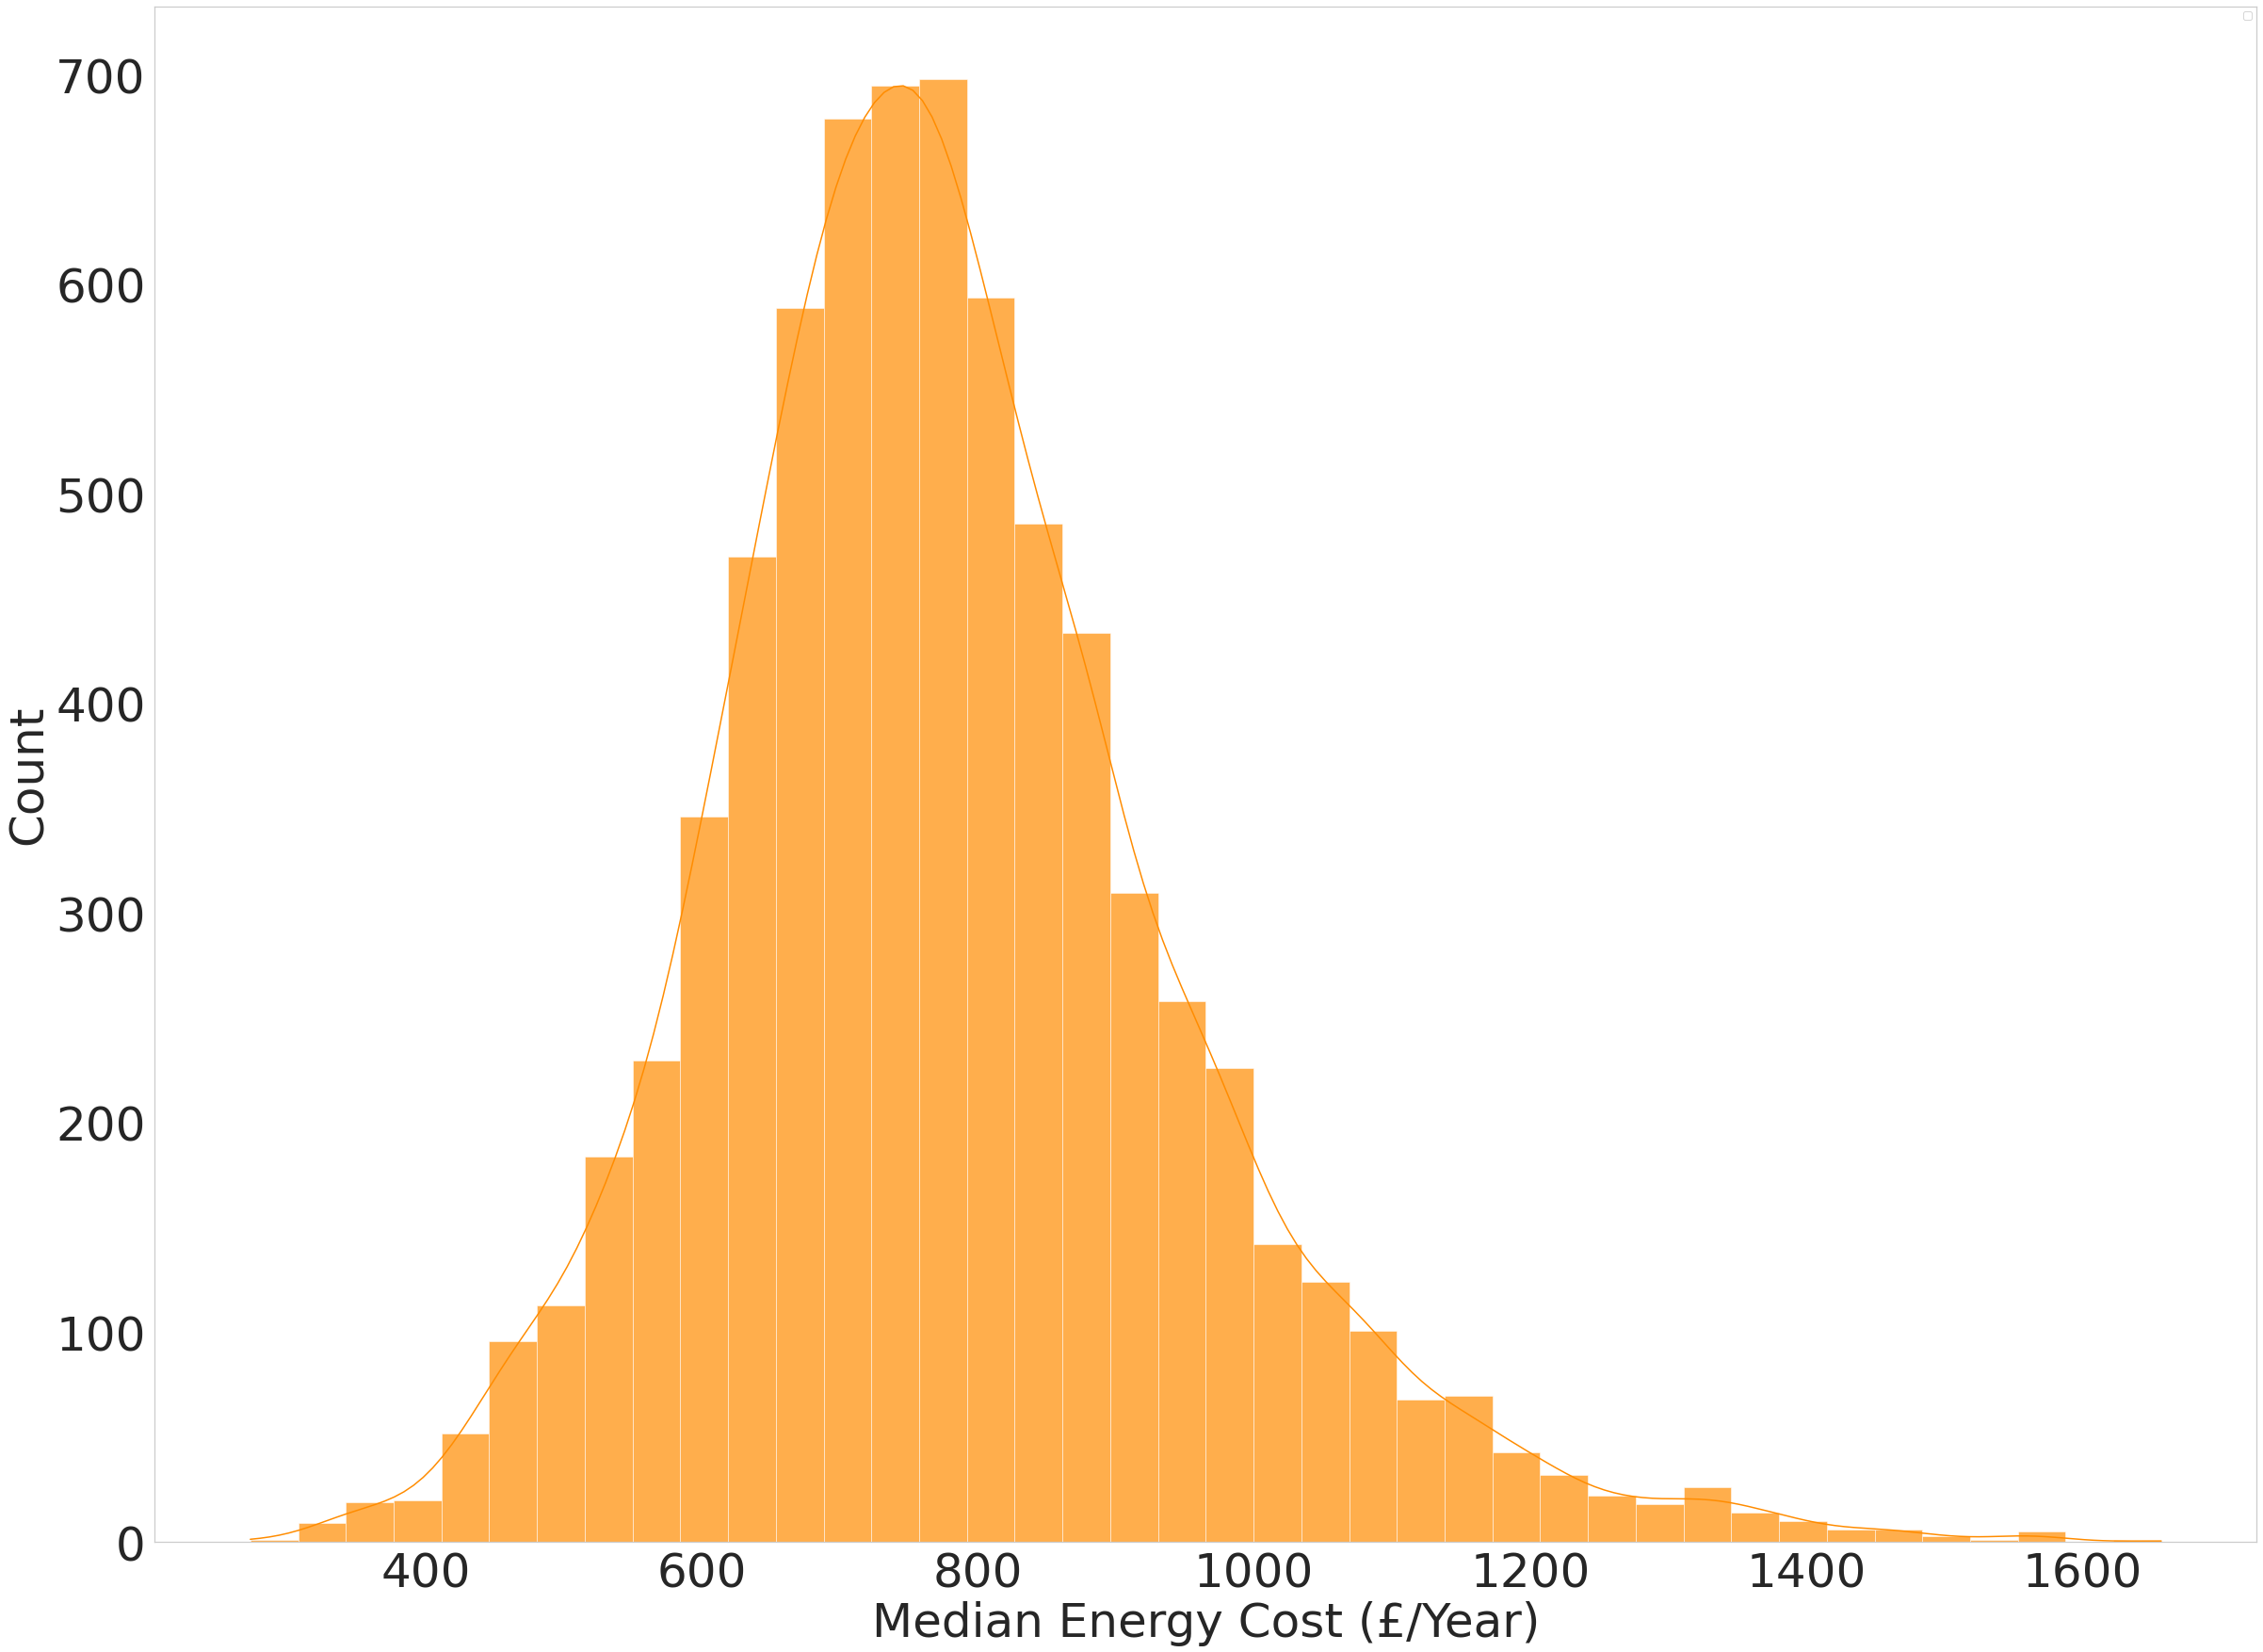

In [284]:
# cost 

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=df, x="Median Energy Cost", kde=True, legend = True, color="darkorange", linewidth=0.5, alpha=0.7, bins=40)
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.grid()
axs.set_xlabel("Median Energy Cost (£/Year)")


plt.legend() 
plt.show()
fig.savefig("cost", transparent=True)

No handles with labels found to put in legend.


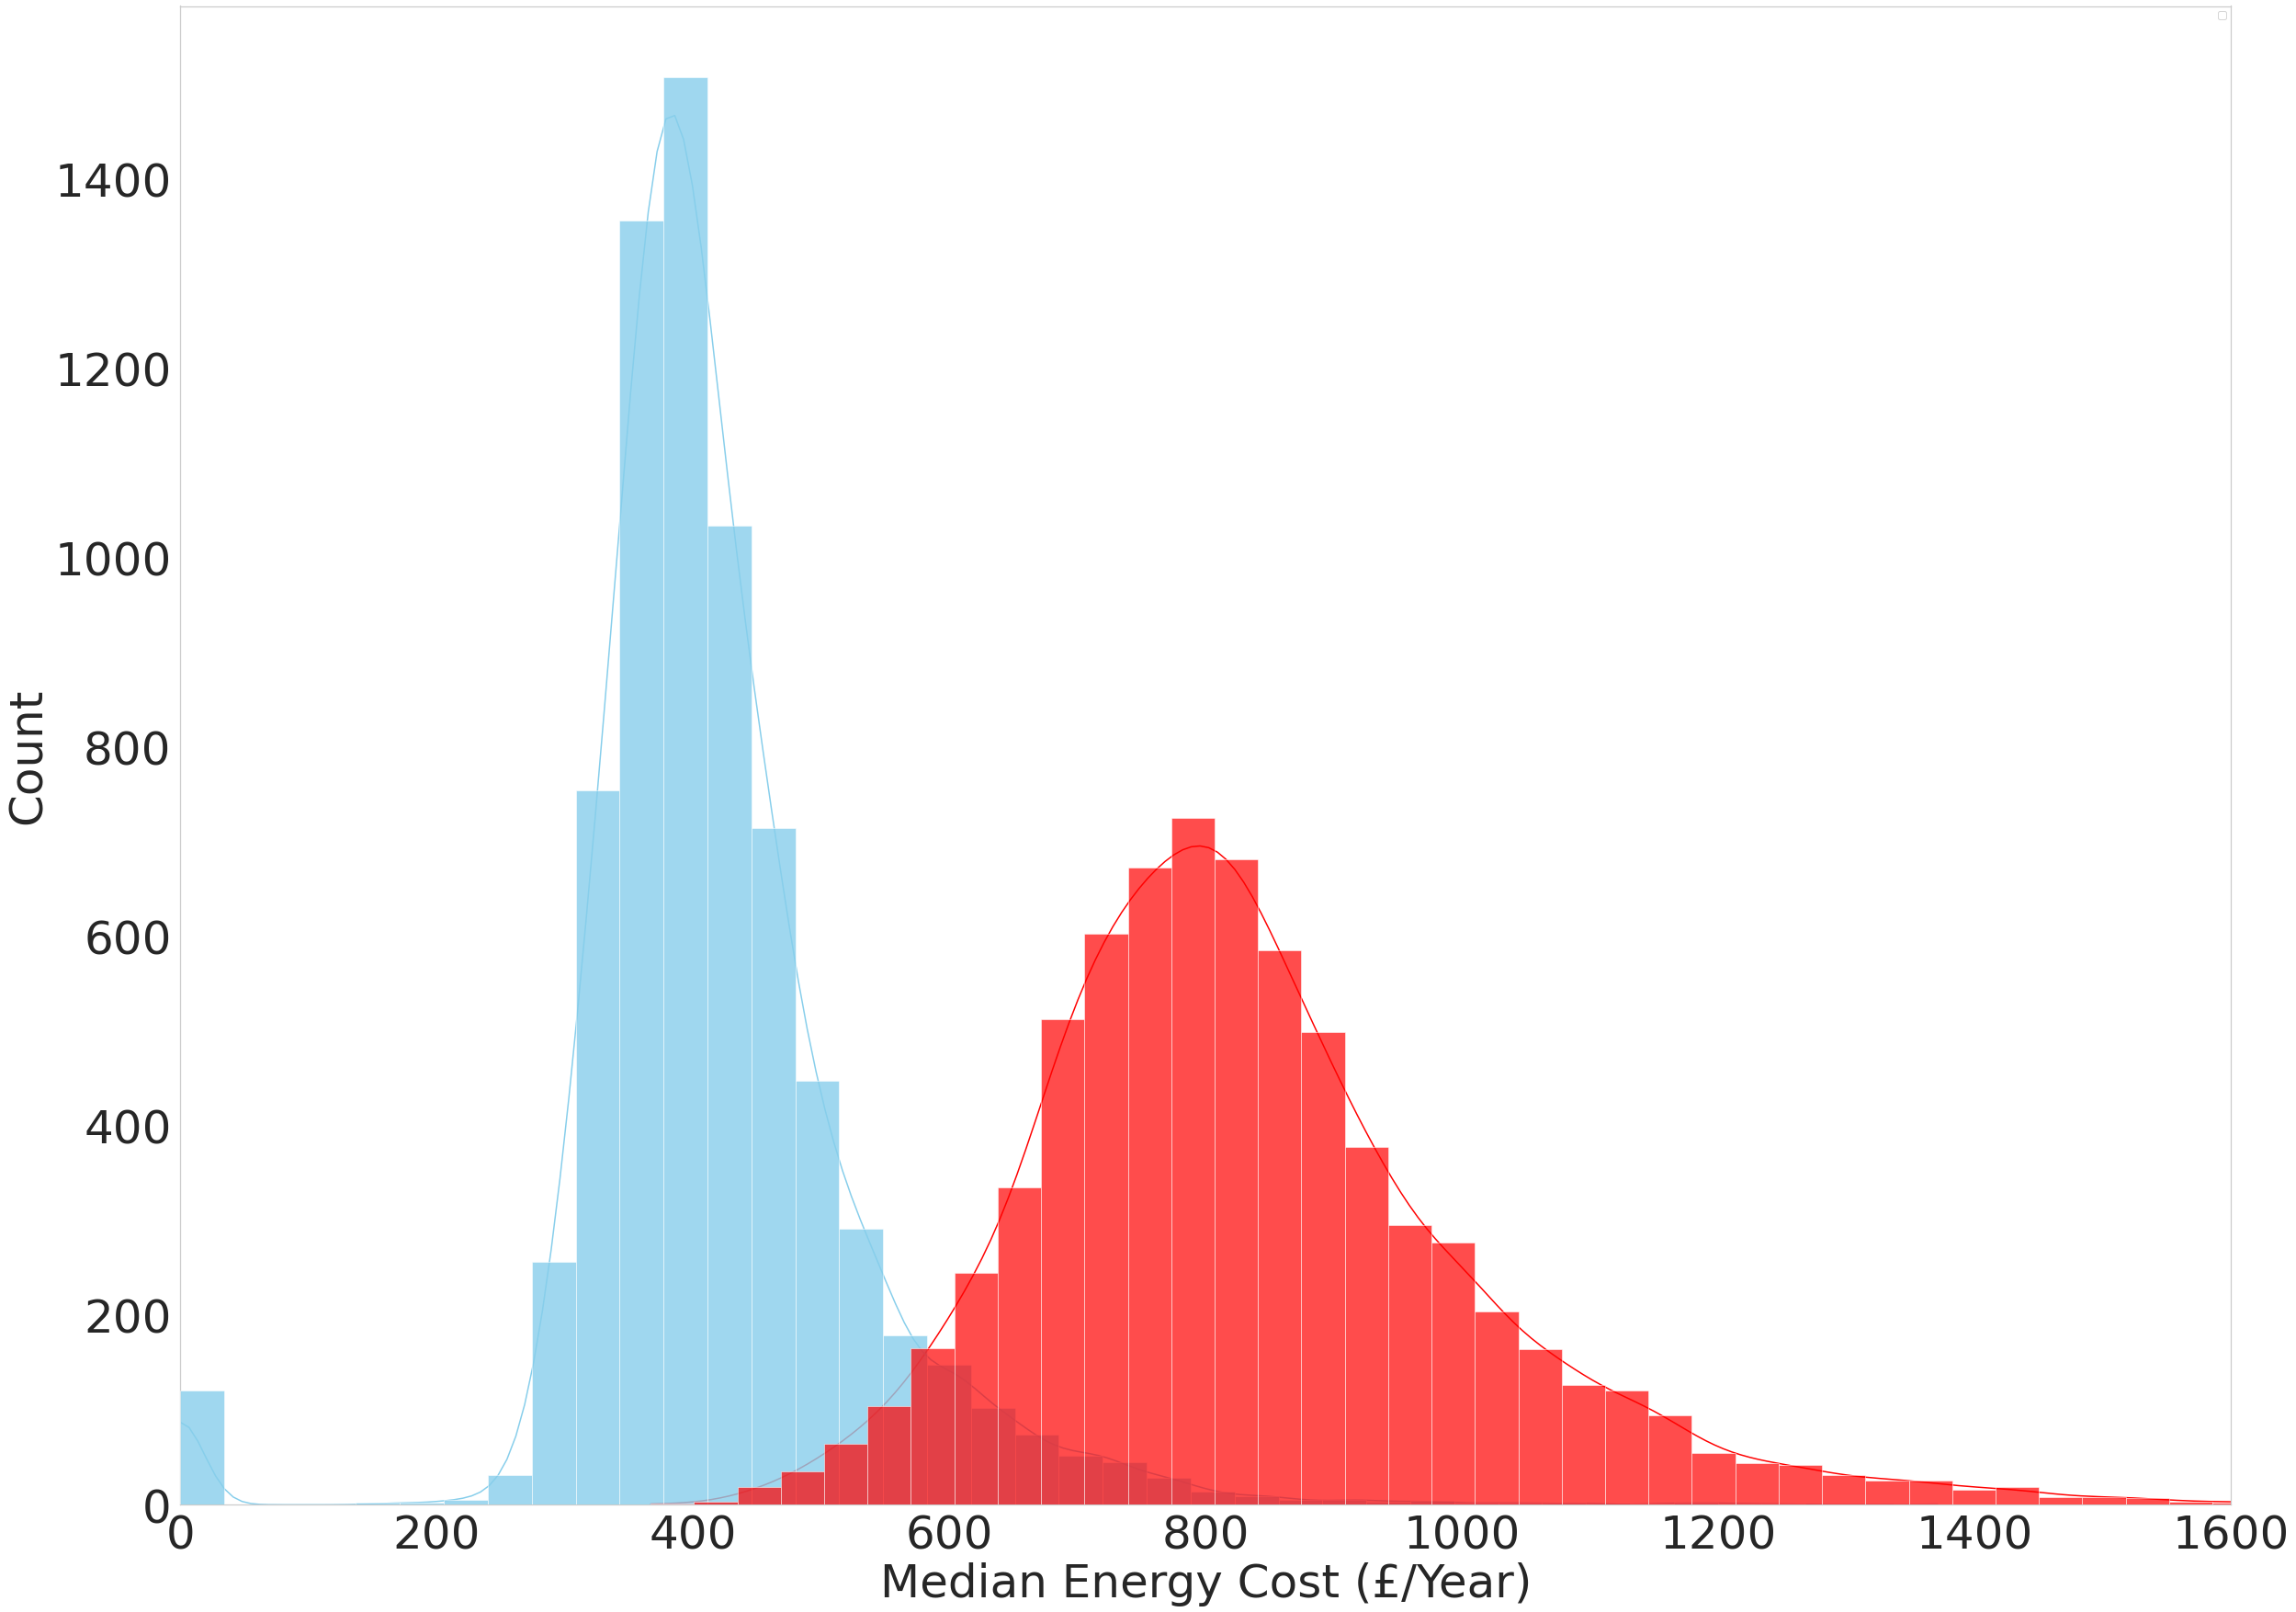

In [285]:
# Plot cost existing and new 

fig, axs = plt.subplots(1, figsize=(40,30))
sns.set(style="whitegrid")

sns.histplot(data=dfold, x="Median Cost Existing Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5,color="red", zorder=11, alpha=0.7)
sns.histplot(data=dfnew, x="Median Cost New Dwellings", bins=40,edgecolor="white", kde=True, legend = False,linewidth=0.5, color="skyblue",zorder=10, alpha=0.8)

axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)
axs.set_xlim(0,1600)
axs.set_xlabel("Median Energy Cost (£/Year)")
axs.grid()
plt.legend() 
plt.show()
fig.savefig("costoldnew", transparent=True)

## Boxplots and Violin Plots

In [ ]:
# violin plot for new and existing dwellings for different heating types
sns.set_theme(style="whitegrid")

sns.set(rc={'figure.figsize':(15,9)})
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=d3_melted, x="heat type", y="value", hue='variable',
               split=True, inner="quart", linewidth=0.5,scale="count",cut=0,
               
               palette={'New Dwellings': "b", 'Existing Dwellings': ".85"})

sns.despine(left=True)

In [ ]:
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot( x=d1_heat['variable'], y=d1_heat['value'],palette="Set2",)

## Scatter plots

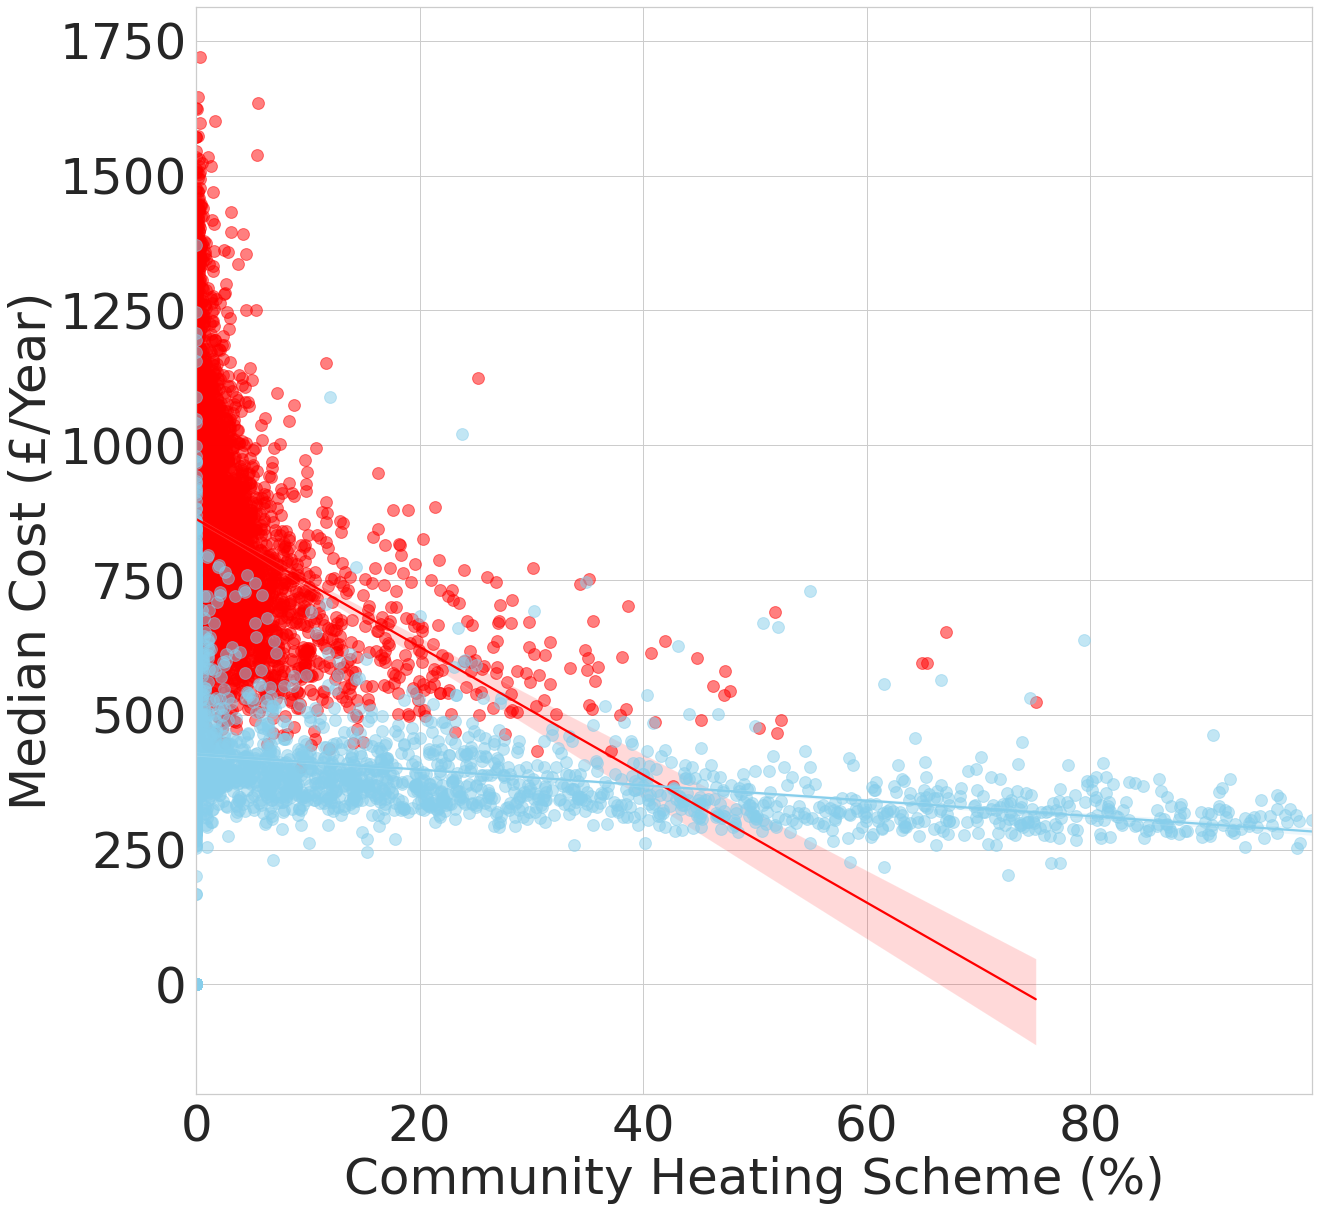

In [302]:
# Heating scheme

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nCommunity heating scheme", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nCommunity heating scheme", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Community Heating Scheme (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("comheat", transparent=True)

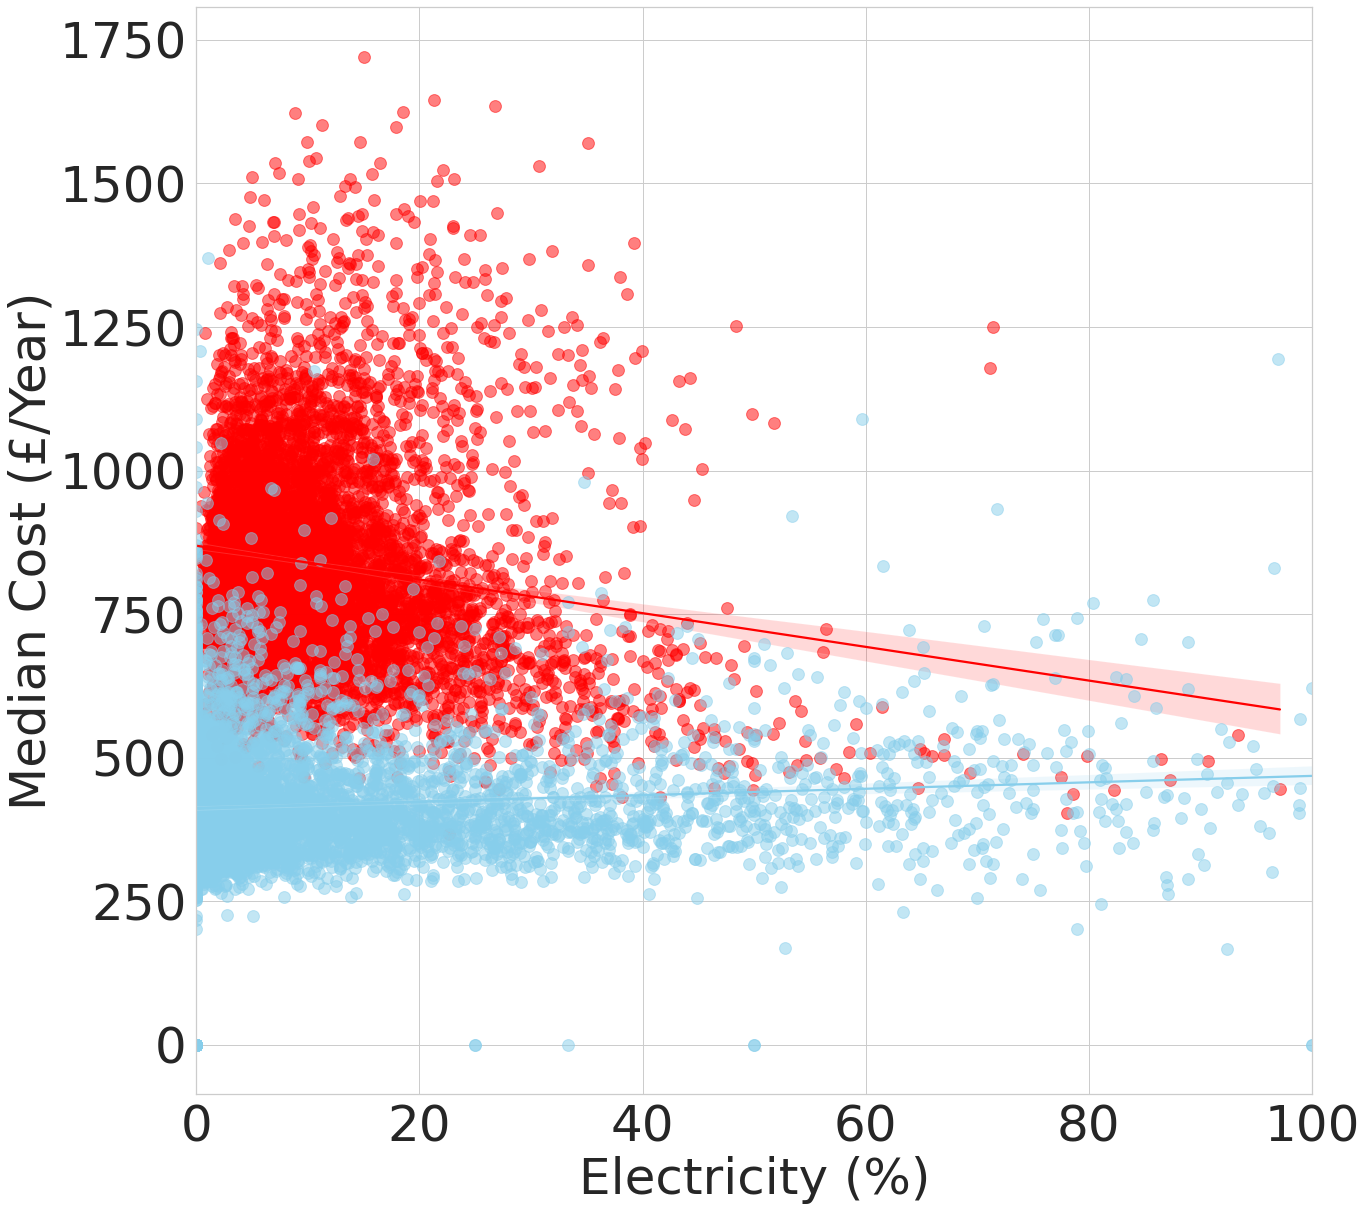

In [303]:
#Electricity

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nElectricity", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nElectricity", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Electricity (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("elec", transparent=True)

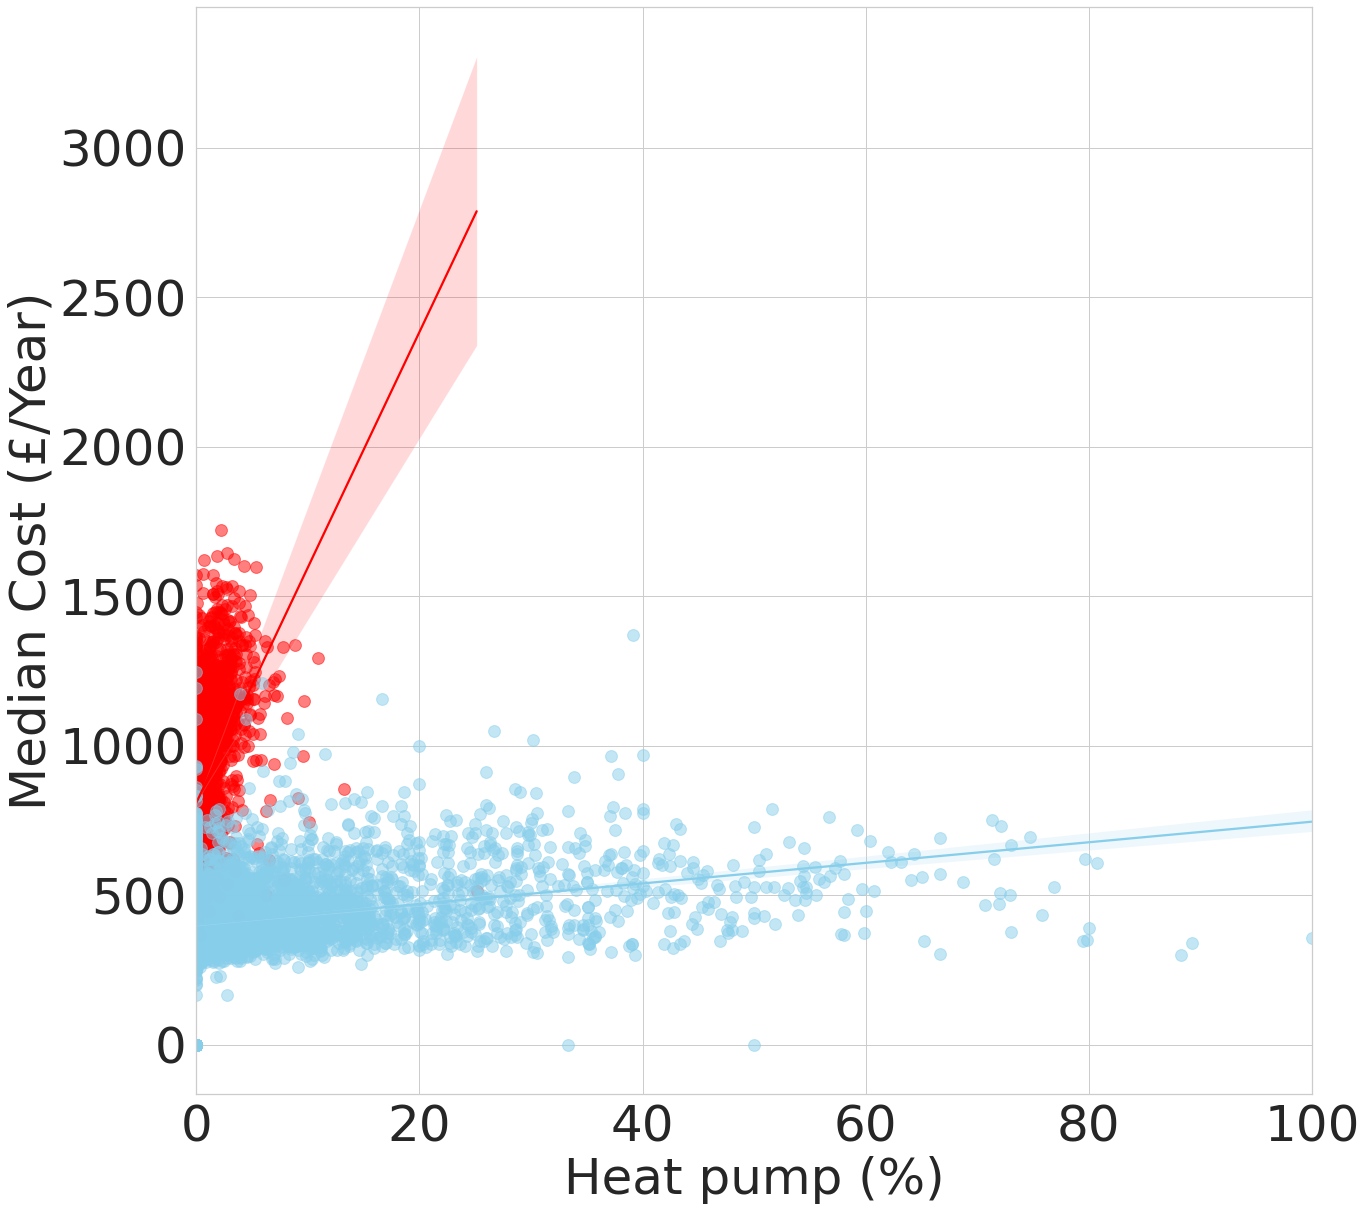

In [304]:
# Heatpump

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nHeat pump", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nHeat pump", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Heat pump (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("heatpump", transparent=True)

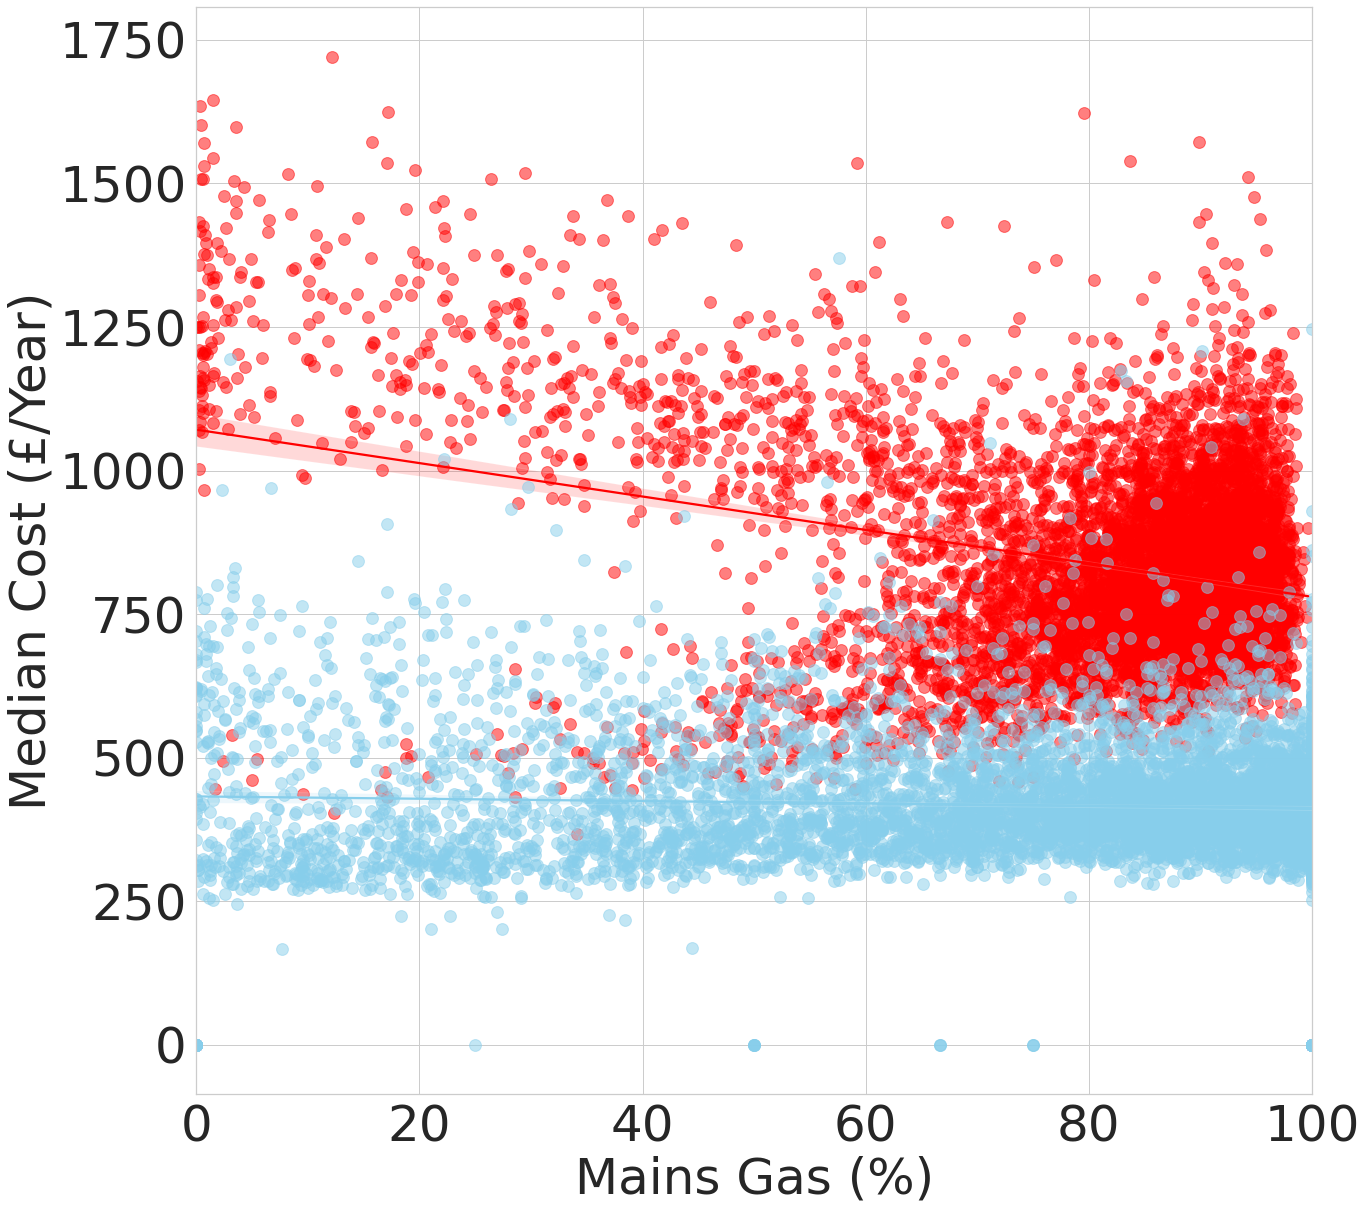

In [305]:
# Mains gas

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nMains gas", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nMains gas", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Mains Gas (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("gas", transparent=True)

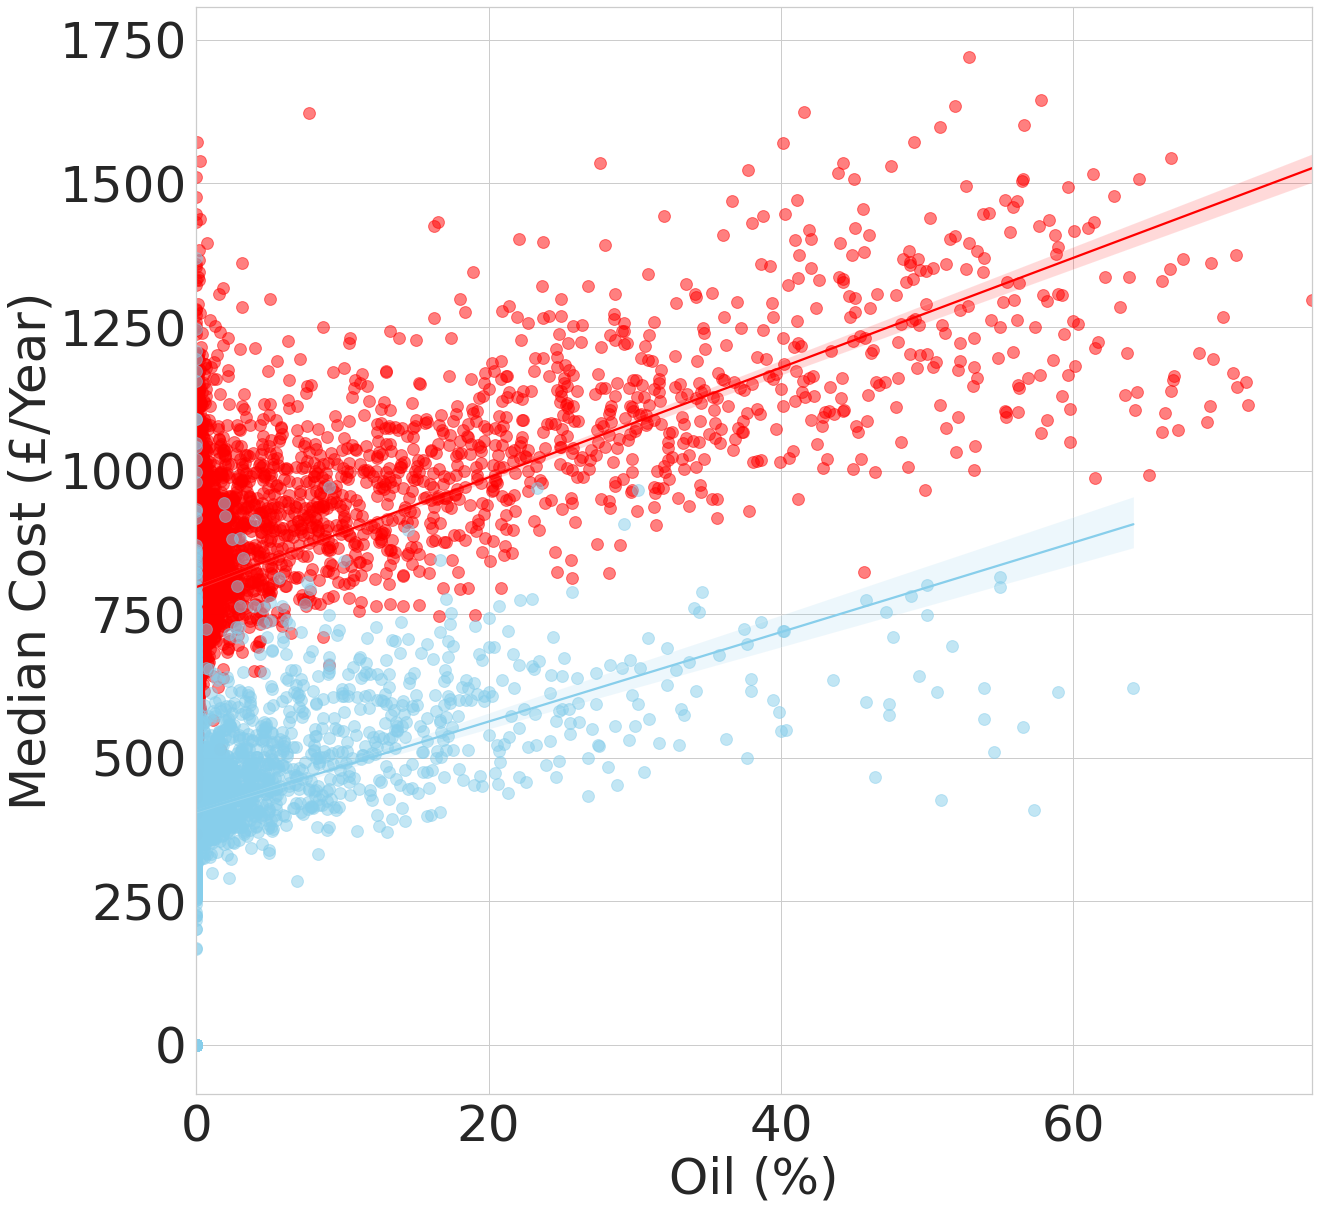

In [306]:
#oil

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nOil", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nOil", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Oil (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("oil", transparent=True)

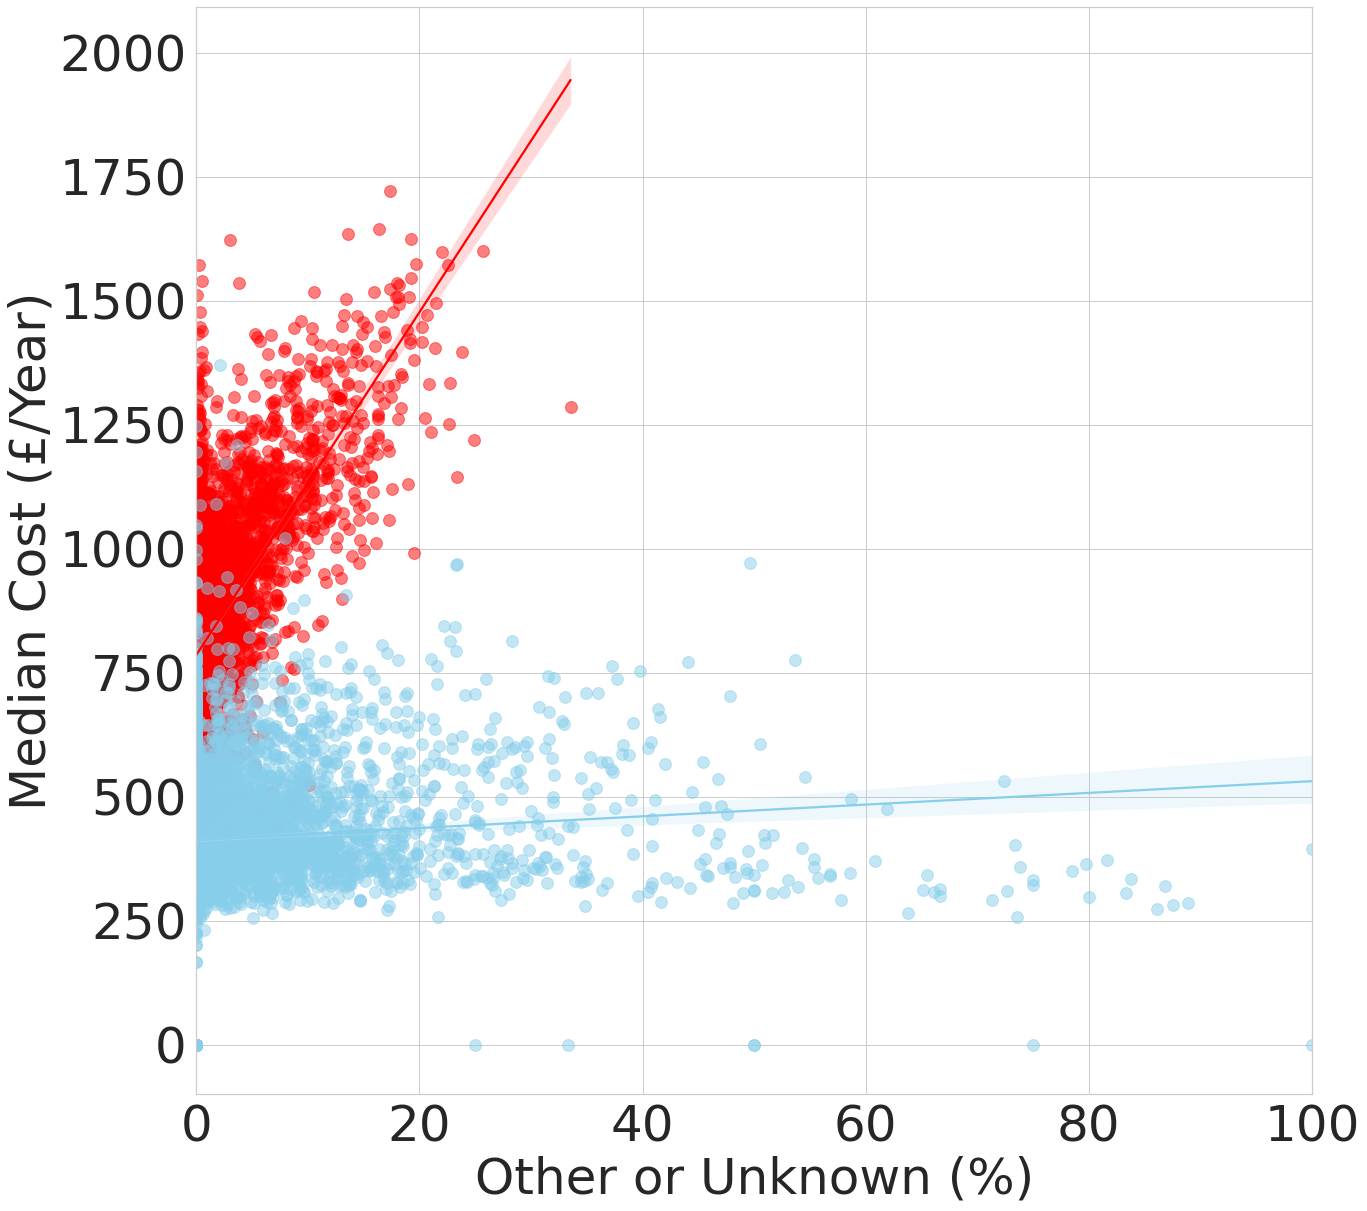

In [307]:
# Other

fig, axs = plt.subplots(1, figsize=(20,20))

sns.regplot(ax=axs, x="Existing\nOther or unknown", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs,x="New\nOther or unknown", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})

axs.set_xlabel("Other or Unknown (%)")
axs.set_ylabel("Median Cost (£/Year)")
axs.xaxis.label.set_size(50)
axs.yaxis.label.set_size(50)
axs.xaxis.set_tick_params(labelsize=50)
axs.yaxis.set_tick_params(labelsize=50)

fig.savefig("other", transparent=True)

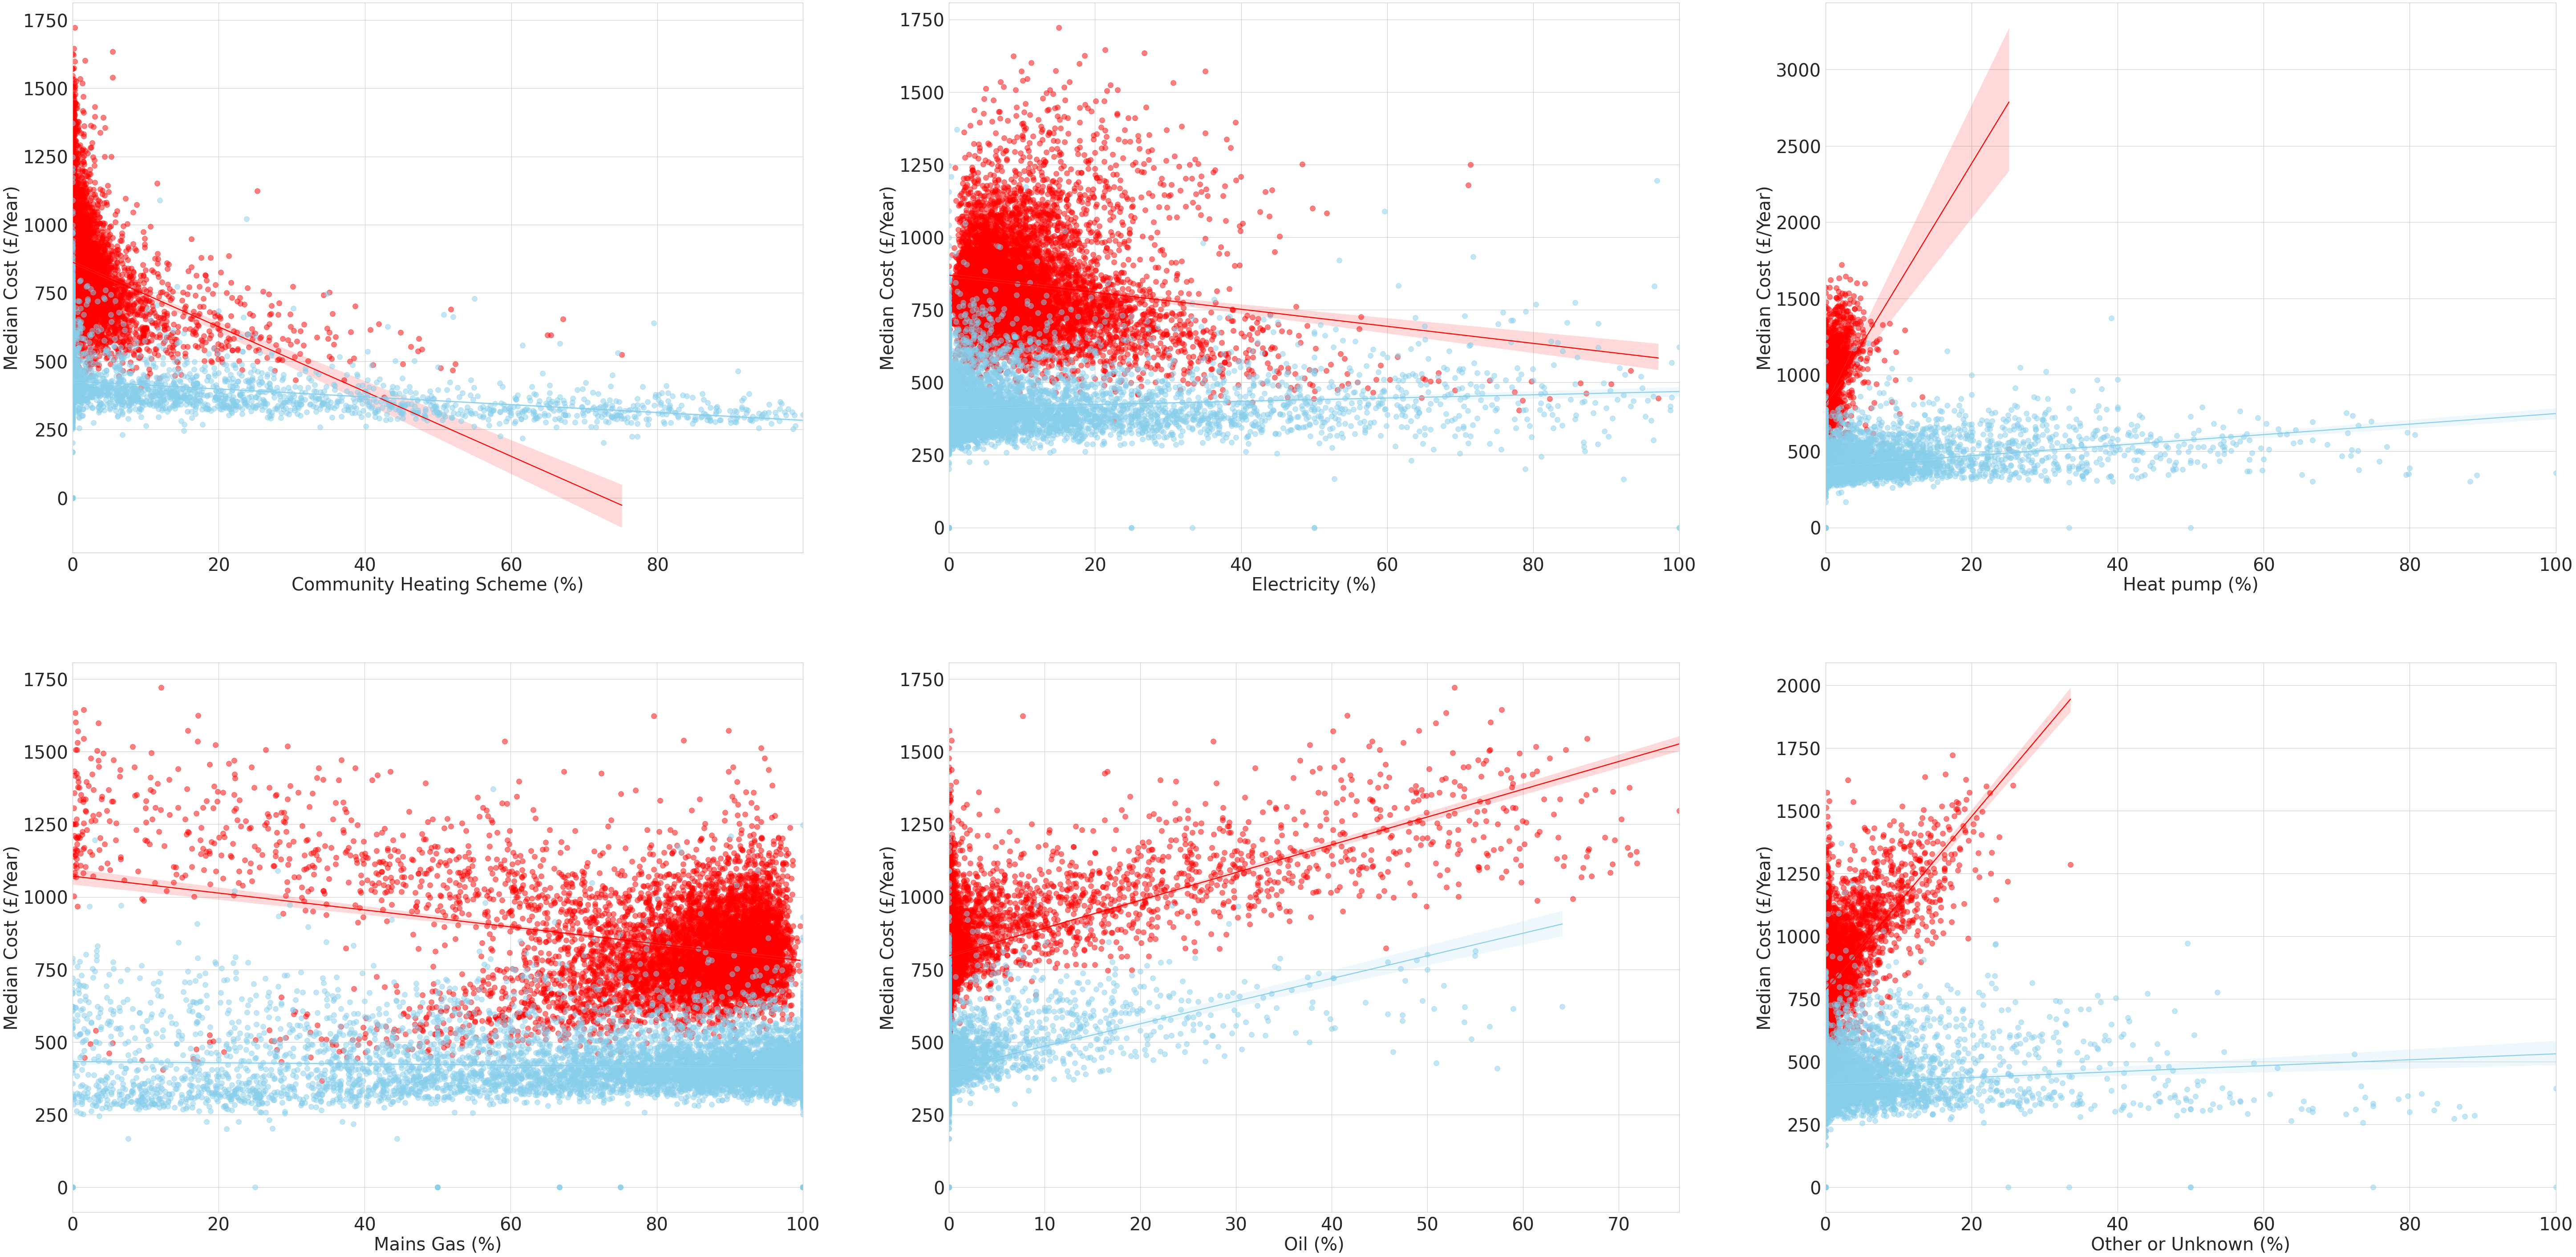

In [333]:
#Plot onto one plot for presentation

fig, axs = plt.subplots(2,3, figsize=(100,50))
sns.regplot(ax=axs[1,2], x="Existing\nOther or unknown", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[1,2],x="New\nOther or unknown", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[1,2].set_xlabel("Other or Unknown (%)")
axs[1,2].set_ylabel("Median Cost (£/Year)")

sns.regplot(ax=axs[1,1], x="Existing\nOil", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[1,1],x="New\nOil", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[1,1].set_xlabel("Oil (%)")
axs[1,1].set_ylabel("Median Cost (£/Year)")

sns.regplot(ax=axs[1,0], x="Existing\nMains gas", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[1,0],x="New\nMains gas", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[1,0].set_xlabel("Mains Gas (%)")
axs[1,0].set_ylabel("Median Cost (£/Year)")

sns.regplot(ax=axs[0,2], x="Existing\nHeat pump", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[0,2],x="New\nHeat pump", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[0,2].set_xlabel("Heat pump (%)")
axs[0,2].set_ylabel("Median Cost (£/Year)")

sns.regplot(ax=axs[0,1], x="Existing\nElectricity", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[0,1],x="New\nElectricity", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[0,1].set_xlabel("Electricity (%)")
axs[0,1].set_ylabel("Median Cost (£/Year)")

sns.regplot(ax=axs[0,0], x="Existing\nCommunity heating scheme", y="Median Cost Existing Dwellings", data=dfold, fit_reg=True, color="red", scatter_kws={'alpha': 0.5, "s":140})
sns.regplot(ax=axs[0,0],x="New\nCommunity heating scheme", y="Median Cost New Dwellings", data=dfnew, fit_reg=True, color="skyblue", scatter_kws={'alpha': 0.5, 's':140})
axs[0,0].set_xlabel("Community Heating Scheme (%)")
axs[0,0].set_ylabel("Median Cost (£/Year)")

axs[1,2].xaxis.label.set_size(40)
axs[1,2].yaxis.label.set_size(40)
axs[1,2].xaxis.set_tick_params(labelsize=40)
axs[1,2].yaxis.set_tick_params(labelsize=40)

axs[1,1].xaxis.label.set_size(40)
axs[1,1].yaxis.label.set_size(40)
axs[1,1].xaxis.set_tick_params(labelsize=40)
axs[1,1].yaxis.set_tick_params(labelsize=40)

axs[1,0].xaxis.label.set_size(40)
axs[1,0].yaxis.label.set_size(40)
axs[1,0].xaxis.set_tick_params(labelsize=40)
axs[1,0].yaxis.set_tick_params(labelsize=40)

axs[0,2].xaxis.label.set_size(40)
axs[0,2].yaxis.label.set_size(40)
axs[0,2].xaxis.set_tick_params(labelsize=40)
axs[0,2].yaxis.set_tick_params(labelsize=40)

axs[0,0].xaxis.label.set_size(40)
axs[0,0].yaxis.label.set_size(40)
axs[0,0].xaxis.set_tick_params(labelsize=40)
axs[0,0].yaxis.set_tick_params(labelsize=40)

axs[0,1].xaxis.label.set_size(40)
axs[0,1].yaxis.label.set_size(40)
axs[0,1].xaxis.set_tick_params(labelsize=40)
axs[0,1].yaxis.set_tick_params(labelsize=40)

fig.savefig("lin", transparent=True)

## Presentation Stats

In [369]:
z=(df["Median Environmental Impact Score"]<70)
y = (z.sum()/len(df))*100
print(str(y) + "% of MSOA's median environmental impact score falls below EPC band C")

91.18178030829051% of MSOA's median environmental impact score falls below EPC band C
